# Predictive Pipeline

In [1]:
import pandas as pd
filename = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/4. Predictive/data_set_1.csv'
df_new_final = pd.read_csv(filename, sep=',', encoding='utf8')
df_new_final.head()

C:\Users\Casa\AppData\Local\Temp\ipykernel_17496\3895357795.py:3: DtypeWarning: Columns (8,14,15,16,17,36,38,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_new_final = pd.read_csv(filename, sep=',', encoding='utf8')


,id,Unnamed: 0,createTime,hashtags,tags,tags_full_name,tags_verified,isPaidPartnership,text,productType,...,tags_count,rank_tags,language,score,translation,translation_len,label_sentiment,score_sentiment,label_hate,score_hate
0,6822,1,2022-06-20 20:53:25+00:00,NaN,NaN,NaN,NaN,False,NaN,story,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,6824,2,2022-06-20 20:53:26+00:00,NaN,NaN,NaN,NaN,False,NaN,story,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,6825,3,2022-06-20 20:53:27+00:00,NaN,NaN,NaN,NaN,False,NaN,story,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,6922,4,2022-06-20 14:26:26+00:00,NaN,NaN,NaN,NaN,False,NaN,story,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,6972,5,2022-06-21 08:02:49+00:00,NaN,NaN,NaN,NaN,False,NaN,story,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [2]:
import numpy as np
#1 Keep only certain columns
df_new_final
data_set_initial=df_new_final[["id","Unnamed: 0","createTime","productType","likeCount","commentCount","tags_count","language","translation_len","label_sentiment","score_sentiment","label_hate","score_hate"]].copy()


#2 extract NAs
data_set_initial=data_set_initial.dropna()

#Dataset with more NLP variables
filename3 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/BD/4. NLP/deus7.csv'
df_nlp = pd.read_csv(filename3, sep=',', encoding='utf8')
df_nlp.head(2)

#Adjust the positive class on the dataset

#Here I merge the two datasets
data_set_initial_2=pd.merge(left=data_set_initial, right=df_nlp[['Unnamed: 0','fk_readability','fk_grade','CARDINAL','GPE','EVENT','FAC','DATE','LANGUAGE','LAW','LOC','MONEY','NORP','ORDINAL','ORG','PERCENT','PERSON','PRODUCT','QUANTITY','TIME','WORK_OF_ART']],how="left", left_on=["Unnamed: 0"], right_on=["Unnamed: 0"])
data_set_initial_2 = data_set_initial_2.drop('Unnamed: 0', axis=1)

#Lets divide the data set to to study
study_set_to_append=data_set_initial_2[data_set_initial_2.label_hate=='hate']
study_set=data_set_initial_2[data_set_initial_2.label_hate=='non-hate']

#Lets study one of the data sets
study_set_h=study_set[["id","label_hate","score_hate"]].copy()

#Lets classify it differently according to the threshold
import numpy as np
study_set_h['score_hate'] = study_set_h['score_hate'].apply(lambda x: x*100)
study_set_h['score_hate']=study_set_h['score_hate'].apply(np.floor)
study_set_h.loc[study_set_h['score_hate'] < 80, 'label_hate'] = 'hate'
study_set_h['label_hate'].value_counts(sort = False)


#Here we analysed the percentage associated to dataset taht we used
a=study_set_h['score_hate'].value_counts()
b=pd.DataFrame(a).reset_index().sort_values(by='index',ascending=False)
b.columns=b.columns.str.replace("index","weight")

percentage=(b[b.weight<81.0]['score_hate'].sum()+len(study_set_to_append))/len(data_set_initial_2)
to_add=b[b.weight<81.0]['score_hate'].sum()
print(f'The current model possesses the weight of {percentage} of positive class with the new thershold, having changed {to_add} and added to the original {len(study_set_to_append)}')

#Lets concat the two strings to be able to later concat with the dataset
data_set_initial_3=pd.concat([study_set_h,study_set_to_append])

    #drop columns and columns names from the concat dataframe 
data_set_initial_4 = data_set_initial_3[['label_hate','id']]
data_set_initial_4.columns=data_set_initial_4.columns.astype(str).str.replace("id","I_d_")
data_set_initial_4.columns=data_set_initial_4.columns.astype(str).str.replace("label_hate","la_bel_ha_te")

    #input to original dataframe and clean it
data_set_initial_5=pd.merge(left=data_set_initial_2, right=data_set_initial_4[['I_d_','la_bel_ha_te']],how="left", left_on=["id"], right_on=["I_d_"])
data_set_initial_5 = data_set_initial_5.drop(['I_d_','label_hate'], axis=1)
data_set_initial_5.columns=data_set_initial_5.columns.astype(str).str.replace("la_bel_ha_te","label_hate")

print(data_set_initial_2['id'].sum()-data_set_initial_3['id'].sum())

#Change names
data_set_initial_5['label_hate'].value_counts(sort = False)

#Replace NAs in NER variables
data_set_initial_5['CARDINAL'] = data_set_initial_5['CARDINAL'].fillna(0)
data_set_initial_5['GPE'] = data_set_initial_5['GPE'].fillna(0)
data_set_initial_5['EVENT'] = data_set_initial_5['EVENT'].fillna(0)
data_set_initial_5['FAC'] = data_set_initial_5['FAC'].fillna(0)
data_set_initial_5['DATE'] = data_set_initial_5['DATE'].fillna(0)
data_set_initial_5['LANGUAGE'] = data_set_initial_5['LANGUAGE'].fillna(0)
data_set_initial_5['LAW'] = data_set_initial_5['LAW'].fillna(0)
data_set_initial_5['LOC'] = data_set_initial_5['LOC'].fillna(0)
data_set_initial_5['MONEY'] = data_set_initial_5['MONEY'].fillna(0)
data_set_initial_5['NORP'] = data_set_initial_5['NORP'].fillna(0)
data_set_initial_5['ORDINAL'] = data_set_initial_5['ORDINAL'].fillna(0)
data_set_initial_5['ORG'] = data_set_initial_5['ORG'].fillna(0)
data_set_initial_5['PERCENT'] = data_set_initial_5['PERCENT'].fillna(0)
data_set_initial_5['PERSON'] = data_set_initial_5['PERSON'].fillna(0)
data_set_initial_5['QUANTITY'] = data_set_initial_5['QUANTITY'].fillna(0)
data_set_initial_5['PRODUCT'] = data_set_initial_5['PRODUCT'].fillna(0)
data_set_initial_5['TIME'] = data_set_initial_5['TIME'].fillna(0)
data_set_initial_5['WORK_OF_ART'] = data_set_initial_5['WORK_OF_ART'].fillna(0)


#Replace NAs in readability variables
fk = {'5th Grade': 5, '6th Grade': 6, '7th Grade': 7, '9th Grade': 8, '11th Grade': 9, 'College Level': 10, 'College Graduate': 11}
data_set_initial_5['fk_grade']=data_set_initial_5['fk_grade'].map(fk)

#Replace NAs in readability variables
data_set_initial_5['fk_readability'] = data_set_initial_5['fk_readability'].fillna(0)
data_set_initial_5['fk_grade'] = data_set_initial_5['fk_grade'].fillna(0)
data_set_initial_5.head(5)



C:\Users\Casa\AppData\Local\Temp\ipykernel_17496\4028298769.py:12: DtypeWarning: Columns (7,13,14,15,16,35,37,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nlp = pd.read_csv(filename3, sep=',', encoding='utf8')


The current model possesses the weight of 0.009043643819566492 of positive class with the new thershold, having changed 209 and added to the original 38
0


,id,createTime,productType,likeCount,commentCount,tags_count,language,translation_len,label_sentiment,score_sentiment,...,NORP,ORDINAL,ORG,PERCENT,PERSON,PRODUCT,QUANTITY,TIME,WORK_OF_ART,label_hate
0,6731,2022-06-11 13:44:34+00:00,carousel_container,1057,4,2,ca,48,NEGATIVE,0.974261,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,non-hate
1,6732,2022-06-05 09:34:23+00:00,clips,2827,35,12,en,42,NEGATIVE,0.998732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non-hate
2,6733,2022-06-04 10:46:57+00:00,feed,1211,13,3,so,23,NEGATIVE,0.989973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non-hate
3,6734,2022-06-03 09:34:19+00:00,clips,6541,158,8,en,428,NEGATIVE,0.946981,...,2.0,1.0,3.0,0.0,4.0,1.0,0.0,0.0,0.0,non-hate
4,6735,2022-06-08 20:24:35+00:00,feed,1330,15,2,it,40,POSITIVE,0.936537,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,non-hate


In [3]:
import datetime as dt
#3 timestamp on create time and order the create time 
data_set_initial_5['createTime'] = pd.to_datetime(data_set_initial_5['createTime'])
data_set_initial_5=data_set_initial_5.sort_values(by=['createTime'])
data_set_initial_5['weekday'] = data_set_initial_5['createTime'].dt.weekday
data_set_initial_5['month'] = pd. DatetimeIndex(data_set_initial_5['createTime']).month

#4 rearrange some of the variables "sentiment"...

    #Next is to pass all the variables to numerical data 
    # we passed the language english to 1 and the other languages to 0
data_set_initial_5['language']=np.where(data_set_initial_5['language']=='en',1,0)

#define variables as get dummies (one hot encoding)
data_set_initial_5=pd.get_dummies(data_set_initial_5,columns=['language'])
data_set_initial_5=pd.get_dummies(data_set_initial_5,columns=['productType'])

    # we passed the language english to 1 and the other languages to 0
d = {'hate': 1, 'non-hate': 0}
data_set_initial_5['label_hate']=data_set_initial_5['label_hate'].map(d)

    # transformed the sentiment score into minus (-) for negative sentiment analysis to plus (+) for positive sentiment analysis,
    #multyplying after that the sentiment score per the sentiment lael numerical change
data_set_initial_5['label_sentiment']=np.where(data_set_initial_5['label_sentiment']=='NEGATIVE',-1,1)
data_set_initial_5['score_sentiment']=data_set_initial_5['score_sentiment'].multiply(data_set_initial_5['label_sentiment'],axis='index')

    #Bring foward the dataset from SNA metrics
filename87 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Notebooks/4. SNA/sna_metrics.csv'
df_gephi = pd.read_csv(filename87, sep=',', encoding='utf8')


    #We are now going to insert the SNA Metrics
data_set_initial_6=pd.merge(left=data_set_initial_5, right=df_gephi[['id','harmonic_centrality','degree_centrality','closeness_centrality','Betweenness']],how="left", left_on=["id"], right_on=["id"])
data_set_initial_6['harmonic_centrality'] = data_set_initial_6['harmonic_centrality'].fillna(data_set_initial_6['harmonic_centrality'].mean())
data_set_initial_6['degree_centrality'] = data_set_initial_6['degree_centrality'].fillna(data_set_initial_6['degree_centrality'].mean())
data_set_initial_6['closeness_centrality'] = data_set_initial_6['closeness_centrality'].fillna(data_set_initial_6['closeness_centrality'].mean())
data_set_initial_6['Betweenness'] = data_set_initial_6['Betweenness'].fillna(data_set_initial_6['Betweenness'].mean())
data_set_initial_6

,id,createTime,likeCount,commentCount,tags_count,translation_len,label_sentiment,score_sentiment,score_hate,fk_readability,...,language_0,language_1,productType_carousel_container,productType_clips,productType_feed,productType_igtv,harmonic_centrality,degree_centrality,closeness_centrality,Betweenness
0,11540,2017-12-31 20:10:58+00:00,17552,295,0,4,1,0.992561,0.888707,121.220,...,1,0,0,0,1,0,33.523858,0.012243,0.027949,216.332754
1,32532,2018-02-05 13:40:01+00:00,5305,17,19,962,1,0.999602,0.990074,-106.935,...,0,1,1,0,0,0,33.523858,0.012243,0.027949,216.332754
2,32530,2018-02-15 15:52:22+00:00,15077,34,4,18,1,0.997795,0.952006,97.025,...,1,0,0,0,1,0,33.523858,0.012243,0.027949,216.332754
3,8265,2018-04-12 17:25:11+00:00,1081,79,3,571,-1,-0.990802,0.984654,-150.322,...,0,1,1,0,0,0,33.523858,0.012243,0.027949,216.332754
4,8264,2018-04-15 16:47:31+00:00,1035,37,14,597,-1,-0.987855,0.983755,-262.105,...,0,1,0,0,1,0,33.523858,0.012243,0.027949,216.332754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27307,135165,2022-08-01 16:35:14+00:00,228,7,8,574,-1,-0.996708,0.977631,-27.776,...,1,0,1,0,0,0,33.523858,0.012243,0.027949,216.332754
27308,135872,2022-08-01 17:38:31+00:00,447,4,2,8,1,0.958316,0.867965,-47.980,...,1,0,0,0,1,0,33.523858,0.012243,0.027949,216.332754
27309,135612,2022-08-01 17:46:35+00:00,532,10,1,722,1,0.998988,0.993002,-51.481,...,1,0,0,0,1,0,33.523858,0.012243,0.027949,216.332754
27310,136110,2022-08-01 18:09:28+00:00,370,3,2,333,-1,-0.972881,0.978928,-87.376,...,0,1,0,0,1,0,33.523858,0.012243,0.027949,216.332754


In [4]:
output_filename34 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/BD/0.Final_Test_Data_set/data_set_to_test.csv'
data_set_initial_6.to_csv(output_filename34, index=False)

In [ ]:
##################################################Start Here######################################

In [ ]:
import pandas as pd
filename85 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/BD/0.Final_Test_Data_set/data_set_to_test.csv'
data_set_initial_6 = pd.read_csv(filename, sep=',', encoding='utf8')
data_set_initial_6.head()

## Data Sets

### 1st Data Set

In [5]:
## Here we are going to take only the variables we want to the dataset, splitting the features from the label objective

data_set_1=data_set_initial_6[["label_hate","likeCount","commentCount","likeCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count"]].copy()
features = data_set_1.drop('label_hate', axis=1)
labels = data_set_1['label_hate']

features_dt_labels=["likeCount","commentCount","likeCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count"]


### 2nd Data Set

In [117]:
## Add variables from the sentiment analysis

data_set_2=data_set_initial_6[["label_hate","likeCount","commentCount","likeCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count","score_sentiment","translation_len","language_0","language_1","fk_readability","fk_grade"]].copy()
features = data_set_2.drop('label_hate', axis=1)
labels = data_set_2['label_hate']

features_dt_labels=["likeCount","commentCount","likeCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count","score_sentiment","translation_len","language_0","language_1","fk_readability","fk_grade"]


### 3rd Data Set

In [ ]:
## Add variables from the sentiment analysis NER
data_set_3=data_set_initial_6[["label_hate","likeCount","commentCount","likeCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count","score_sentiment","translation_len","language_0","language_1","fk_readability","fk_grade","CARDINAL","GPE","EVENT","FAC","DATE","LANGUAGE","LAW","LOC","MONEY","NORP","ORDINAL","ORG","PERCENT","PERSON","PRODUCT","QUANTITY","TIME","WORK_OF_ART"]].copy()
features = data_set_3.drop('label_hate', axis=1)
labels = data_set_3['label_hate']

features_dt_labels=["label_hate","likeCount","commentCount","likeCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count","score_sentiment","translation_len","language_0","language_1","fk_readability","fk_grade","CARDINAL","GPE","EVENT","FAC","DATE","LANGUAGE","LAW","LOC","MONEY","NORP","ORDINAL","ORG","PERCENT","PERSON","PRODUCT","QUANTITY","TIME","WORK_OF_ART"]


### 4th Data Set

In [198]:
## Add variables from the sentiment analysis SNA
data_set_4=data_set_initial_6[["label_hate","likeCount","commentCount","likeCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count","score_sentiment","translation_len","language_0","language_1","fk_readability","fk_grade","CARDINAL","GPE","EVENT","FAC","DATE","LANGUAGE","LAW","LOC","MONEY","NORP","ORDINAL","ORG","PERCENT","PERSON","PRODUCT","QUANTITY","TIME","WORK_OF_ART","harmonic_centrality","degree_centrality","closeness_centrality","Betweenness"]].copy()
features = data_set_4.drop('label_hate', axis=1)
labels = data_set_4['label_hate']

features_dt_labels=["label_hate","likeCount","commentCount","likeCount","weekday","month","productType_carousel_container","productType_clips","productType_feed","productType_igtv","tags_count","score_sentiment","translation_len","language_0","language_1","fk_readability","fk_grade","CARDINAL","GPE","EVENT","FAC","DATE","LANGUAGE","LAW","LOC","MONEY","NORP","ORDINAL","ORG","PERCENT","PERSON","PRODUCT","QUANTITY","TIME","WORK_OF_ART","harmonic_centrality","degree_centrality","closeness_centrality","Betweenness"]


### 1 Split of Data

In [27]:
#Please install the below packages
#!pip install graphviz

     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [29]:
#Please install the below packages
#conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Casa\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anaconda-2022.10           |          py310_0          13 KB
    ca-certificates-2022.10.11 |       haa95532_0         125 KB
    cairo-1.16.0               |       he04af86_2         1.5 MB
    certifi-2022.9.24          |   py39haa95532_0         154 KB
    cryptography-38.0.1        |   py39h21b164f_0         991 KB
    dill-0.3.6                 |   py39haa95532_0         186 KB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2022.10=py39_0
  - defaults/win-64::anaconda-client==1.11.0=py39haa95532_0
  - defaults/win-64::anaconda-navigator==2.3.2=py39haa95532_0
  - defaults/win-64::anaconda-project==0.11.1=py39haa95532_0
  - defaults/win-64::boto3==1.24.28=py39haa95532_0
  - defaults/win-64::botocore==1.27.28=py39haa95532_0
  - defaults/win-64::colorcet==3.0.0=py39haa95532_0
  - defaults/win-64::conda==22.9.0=py39haa95532_0
  - defaults/win-64::conda-build==3.22.0=py39haa95532_0
  - defaults/win-64::conda-content-trust==0.1.3=py39haa95532_0
  - defaults/win-64::conda-repo-cli==1.0.20=py39haa95532_0
  - defaults/noarch::conda-token==0.4.0=pyhd3eb1b0_0
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - defaults/win-64::dask==2022.7.0=py39haa95532_0
  - defaults/win-64::datashader==0.14.1=py39haa95532_0
  - defaults/win-64::distributed==2022.7.0=p

#### Split of data set

In [199]:
#We have to divide the dataset and we will first build it with only
#(#https://stackabuse.com/decision-trees-in-python-with-scikit-learn/)

#train_data_set=first_dataset_1[0:int(0.8*len(first_dataset_1.index))].copy()
#test_data_set=first_dataset_1[int(0.8*len(first_dataset_1.index))+1:len(first_dataset_1.index)].copy()

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

#### SMOTE the poop out of it

In [54]:
#!pip install -U imbalanced-learn

     ------------------------------------ 225.4/225.4 kB 196.6 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 200.2 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [200]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

print(Counter(train_labels))
print(Counter(test_labels))
print(f'The class we want to predict is unbalanced the prediction models had to be Smote to be able to learn')

#Source: https://medium.com/grabngoinfo/four-oversampling-and-under-sampling-methods-for-imbalanced-classification-using-python-7304aedf9037
#Source: https://towardsdatascience.com/oversampling-and-undersampling-5e2bbaf56dcf


Counter({0: 20315, 1: 169})
Counter({0: 6773, 1: 55})
The class we want to predict is unbalanced the prediction models had to be Smote to be able to learn


##### Lets start by oversampling

###### Random oversampling
Is to generate new samples for the minority class by sampling with replacement

In [201]:
# instantiating the random over sampler 
ros = RandomOverSampler(random_state=42)
# Randomly over sample the minority class
train_features_ros, train_labels_ros= ros.fit_resample(train_features, train_labels)
# Check the number of records after over sampling
print(Counter(train_labels_ros))

Counter({0: 20315, 1: 20315})


###### SMOTE oversampling
SMOTE takes each minority sample and introduces synthetic data points connecting the minority sample and its nearest neighbors. Neighbors from the k nearest neighbors are chosen randomly

In [202]:
# Randomly over sample the minority class
smote = SMOTE(random_state=42)
train_features_smote, train_labels_smote= smote.fit_resample(train_features, train_labels)
# Check the number of records after over sampling
print(sorted(Counter(train_labels_smote).items()))

[(0, 20315), (1, 20315)]


##### Lets follow with undersampling

###### Random undersampling
Random under-sampling randomly picks data points from the majority class

In [203]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
train_features_rus, train_labels_rus= rus.fit_resample(train_features, train_labels)
# Check the number of records after under sampling
print(sorted(Counter(train_labels_rus).items()))

[(0, 169), (1, 169)]


###### Under-Sampling Using NearMiss
Near miss uses the KNN (K Nearest Neighbors) to do under-sampling. We are going to test the 3 versions

NearMiss 1: Selects the positive samples for which the average distance to the N closest samples of the negative class is the smallest

In [204]:
# Under sample the majority class
nearmiss = NearMiss(version=1)
train_features_nearmiss1, train_labels_nearmiss1= nearmiss.fit_resample(train_features, train_labels)
# Check the number of records after under sampling
print(sorted(Counter(train_labels_nearmiss1).items()))

[(0, 169), (1, 169)]


NearMiss 2: selects the positive samples for which the average distance to the N farthest samples of the negative class is the smallest.

In [205]:
# Under sample the majority class
nearmiss = NearMiss(version=2)
train_features_nearmiss2, train_labels_nearmiss2= nearmiss.fit_resample(train_features, train_labels)
# Check the number of records after under sampling
print(sorted(Counter(train_labels_nearmiss2).items()))

[(0, 169), (1, 169)]


NearMiss 3: is a 2-steps algorithm:
 (1) First, for each negative sample, their M nearest-neighbors will be kept.
 (2) Then, the positive samples selected are the one for which the average distance to the N nearest-neighbors is the largest.

In [206]:
# Under sample the majority class
nearmiss = NearMiss(version=3)
train_features_nearmiss3, train_labels_nearmiss3= nearmiss.fit_resample(train_features, train_labels)
# Check the number of records after over sampling
print(sorted(Counter(train_labels_nearmiss3).items()))

[(0, 169), (1, 169)]


### 1.2 Random Forest

In [207]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf_learn =rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
rf_predictions = rf_learn.predict(test_features)

#Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
        #https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

##### 1.2.1 Evaluation

###### 1.2.1.1 Assessment Variables

In [127]:
#Now we are to create the classification and matrix table 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_labels, rf_predictions))
print(classification_report(test_labels, rf_predictions))

[[6773    0]
 [  55    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6773
           1       0.00      0.00      0.00        55

    accuracy                           0.99      6828
   macro avg       0.50      0.50      0.50      6828
weighted avg       0.98      0.99      0.99      6828



C:\Users\Casa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Casa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Casa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [208]:
#Lets define the variables for the model assessment
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accu_rf=accuracy_score(test_labels, rf_predictions)
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
prec_rf=precision_score(test_labels, rf_predictions)
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
recall_rf=recall_score(test_labels, rf_predictions)
#The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
#F1 = 2 * (precision * recall) / (precision + recall)
f1_rf=f1_score(test_labels, rf_predictions)
print(f'The current model possesses the accuracy of  {accu_rf}, precision of {prec_rf}, recall of {recall_rf}, and f1 measures of recall {f1_rf} \n With a precision value of zero, no true positive was predicted')


The current model possesses the accuracy of  0.9919449326303457, precision of 0.0, recall of 0.0, and f1 measures of recall 0.0 
 With a precision value of zero, no true positive was predicted


C:\Users\Casa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### 1.2.1.2 ROC Curve

In [209]:
## ROC Curve
#Make probability predictions
train_probs = rf_learn.predict_proba(train_features)[:,1] 
probs = rf_learn.predict_proba(test_features)[:, 1]
train_predictions = rf_learn.predict(train_features)

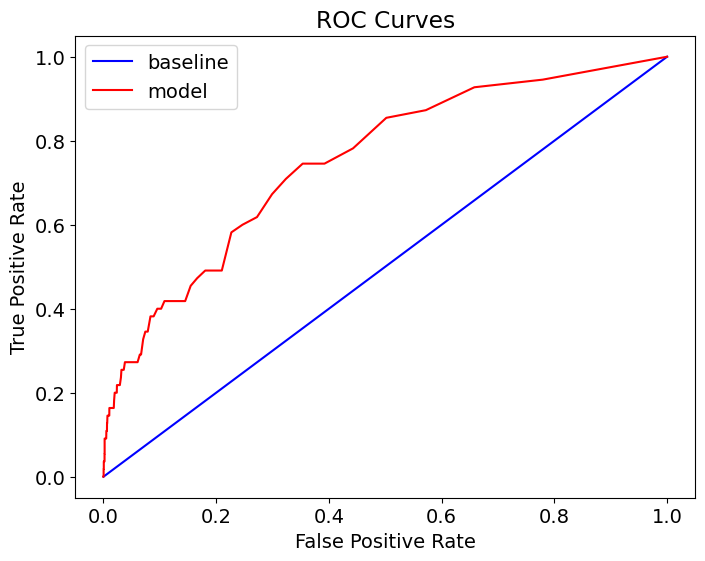

1.0
0.7508945948485295


In [210]:
#Lets now plot a Roc curve from the random forest model
    #Still need to properly save the auc variables
    #Still in need of writting conclusions
    #Still in need to see the overfitting effect (find a way of seeing)

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
model_fpr, model_tpr, _ = roc_curve(test_labels, probs)
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 14
    # Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.plot(model_fpr, model_tpr, 'r', label = 'model')
plt.legend();
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
plt.show();

#Respective Area under the curve
print(roc_auc_score(train_labels, train_probs))
print(roc_auc_score(test_labels, probs))
#Source: https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f
        # https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

###### 1.2.1.3 Confusion Matrix

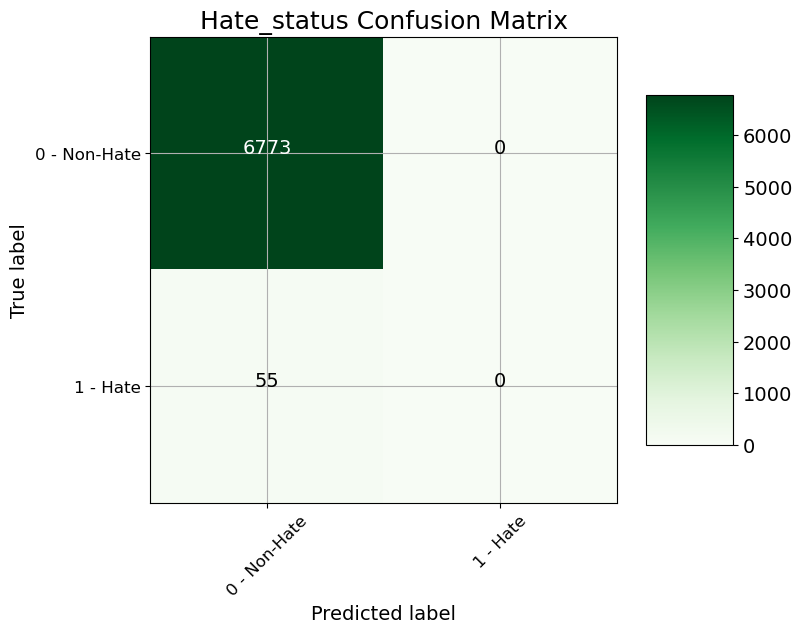

In [211]:
#Perform a confusion matrix clean and presentable as well

import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 18)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, size = 12)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 14,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 14)
    plt.xlabel('Predicted label', size = 14)
    
# Let's plot it out
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['0 - Non-Hate', '1 - Hate'],
                      title = 'Hate_status Confusion Matrix')
#Source: https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f
        #(last point on the evaluation

##### 1.2.3 Feature Importance

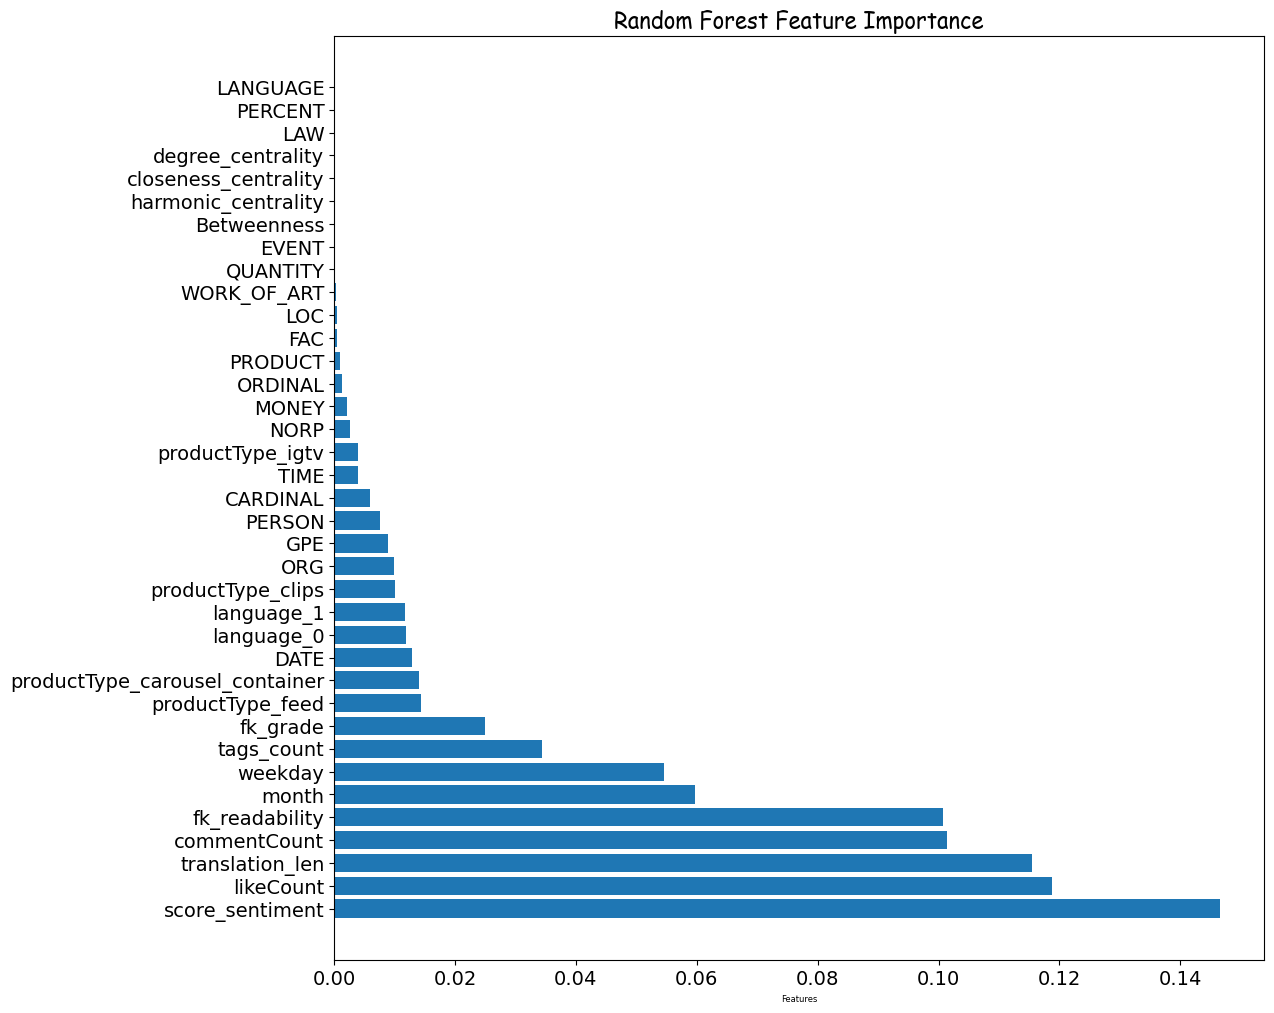

In [215]:
# Feature Importance
import pandas as pd
fi = pd.DataFrame({'feature': list(train_features.columns),
                   'importance': rf_learn.feature_importances_}).\
                    sort_values('importance', ascending = False)
#print(fi.head())

# Plot the top 25 feature importance
#feature_names_4 = [i[0] for i in feature_importances_ranked[:3]]
#y_ticks = np.arange(0, len(feature_names_4))
#x_axis = [i[1] for i in feature_importances_ranked[:3]]
plt.figure(figsize = (12, 12))
plt.barh(fi.feature, fi.importance)   #horizontal barplot
plt.title('Random Forest Feature Importance',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 16})
plt.xlabel('Features',fontdict= {'fontsize' : 6})
plt.show()

Feature Importance: Clearly the feature that more contributes is the fealing associated to it, being afterwards the tags_rank_avg (possibily the tags that once input on comment, the more refered is, the more it contributes for the hate speech recognition

##### 1.2.4 Tune the hyperparameters

In [216]:
#What parameters are currently being used by the 
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [217]:
# Creation of the variables to than better maximize the respective models 
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 50)]
max_features = ['auto', 'log2']  # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]   # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]  # Minimum number of samples required to split a node
min_samples_leaf = [1, 4, 10]    # Minimum number of samples required at each leaf node
bootstrap = [True, False]       # Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
               'bootstrap': bootstrap}
seed=50

In [218]:
rf_1 = RandomForestClassifier(oob_score=True, n_jobs=-1)
rf_random = RandomizedSearchCV(
                estimator = rf_1,
                param_distributions = random_grid,
                n_iter = 50, cv = 3,
                verbose=1, random_state=seed,
                scoring='roc_auc')
rf_random.fit(train_features, train_labels)
rf_random.best_params_

#pipe_random = make_pipeline(col_trans, rf_random)
#pipe_random.fit(X_train, y_train)
#rf_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\Casa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Casa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Casa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\User

{'n_estimators': 491,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_leaf_nodes': 31,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [219]:
#Lets check which hyperparameters where we need to optimize
optimize=pd.DataFrame(rf_random.best_params_,index=[0])
before_optimize=pd.DataFrame(rf.get_params(),index=[0])
optimize1=pd.concat([optimize,before_optimize.set_index(optimize.index)])
#tags_split=pd.concat([tags_base,tag_3.set_index(tags_base.index)],axis=1)
optimize1.head(5)

,n_estimators,min_samples_split,min_samples_leaf,max_leaf_nodes,max_features,max_depth,bootstrap,ccp_alpha,class_weight,criterion,max_samples,min_impurity_decrease,min_weight_fraction_leaf,n_jobs,oob_score,random_state,verbose,warm_start
0,491,2,10,31,auto,80,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1000,2,1,None,auto,None,True,0.0,None,gini,None,0.0,0.0,None,False,42.0,0.0,False


In [220]:
# Use the best model after tuning and predict
best_model = rf_random.best_estimator_
best_model.fit(train_features, train_labels)
pred_best_model_rf = best_model.predict(test_features)

In [221]:
# To look at nodes and depths of trees use on average
n_nodes = []
max_depths = []
for ind_tree in best_model.estimators_:
       n_nodes.append(ind_tree.tree_.node_count)
       max_depths.append(ind_tree.tree_.max_depth)
print(f'Average number of nodes {int(np.mean(n_nodes))}')   
print(f'Average maximum depth {int(np.mean(max_depths))}')  

Average number of nodes 61
Average maximum depth 12


In [222]:
#Confusion Matrix and evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_labels, pred_best_model_rf))
print(classification_report(test_labels, pred_best_model_rf))
#Still missing a table to store the calculation of the values

[[6773    0]
 [  55    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6773
           1       0.00      0.00      0.00        55

    accuracy                           0.99      6828
   macro avg       0.50      0.50      0.50      6828
weighted avg       0.98      0.99      0.99      6828



C:\Users\Casa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Casa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Casa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [223]:
#Lets define the variables for the model assessment
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accu_rf_opt=accuracy_score(test_labels, pred_best_model_rf)
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
prec_rf_opt=precision_score(test_labels, pred_best_model_rf)
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
recall_rf_opt=recall_score(test_labels, pred_best_model_rf)
#The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
#F1 = 2 * (precision * recall) / (precision + recall)
f1_rf_opt=f1_score(test_labels, pred_best_model_rf)


C:\Users\Casa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


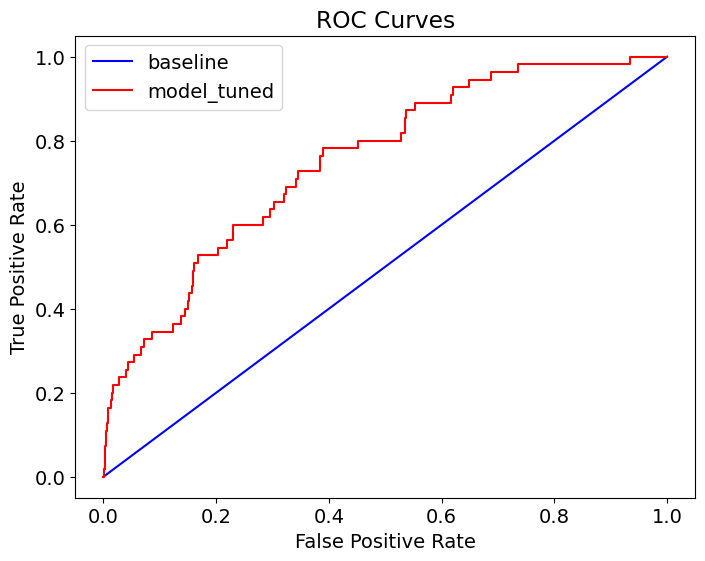

0.9533504114923681
0.7523804410560648


In [224]:
#ROC curve
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_probs_tune = best_model.predict_proba(train_features)[:,1] 
probs_tune = best_model.predict_proba(test_features)[:, 1]
train_predictions_tune = best_model.predict(train_features)


base_fpr_tune, base_tpr_tune, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
model_fpr_tune, model_tpr_tune, _ = roc_curve(test_labels, probs_tune)
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 14
    # Plot both curves
plt.plot(base_fpr_tune, base_tpr_tune, 'b', label = 'baseline')
plt.plot(model_fpr_tune, model_tpr_tune, 'r', label = 'model_tuned')
plt.legend();
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate'); 
plt.title('ROC Curves');
plt.show();

#Respective Area under the curve
print(roc_auc_score(train_labels, train_probs_tune))
print(roc_auc_score(test_labels, probs_tune))
#Source: https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f
        # https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
        # https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f

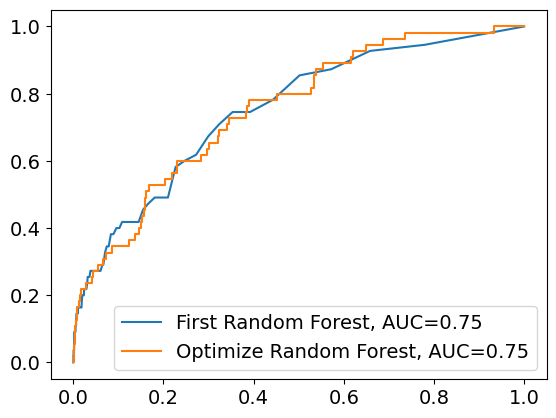

In [225]:
#Now we will plot the two models to be able to assess the two models

#set up plotting area
plt.figure(0).clf()

#fit first random forest model and plot ROC curve
auc1 = round(metrics.roc_auc_score(test_labels, probs), 2)
plt.plot(model_fpr,model_tpr,label="First Random Forest, AUC="+str(auc1))

#fit optimize random forest model and plot ROC curve
auc2 = round(metrics.roc_auc_score(test_labels, probs_tune), 2)
plt.plot(model_fpr_tune, model_tpr_tune,label="Optimize Random Forest, AUC="+str(auc2))

#add legend
plt.legend()

#Fazer uma analise sobre custo do negocio de false positives para perceber 
#Source: https://www.statology.org/plot-multiple-roc-curves-python/

In [226]:
print(f'Conclusion: There is an improvement for the fine tuned model from and AUC = {round(roc_auc_score(test_labels, probs),2)}, to a AUC =  {round(roc_auc_score(test_labels, probs_tune),2)}')

Conclusion: There is an improvement for the fine tuned model from and AUC = 0.75, to a AUC =  0.75


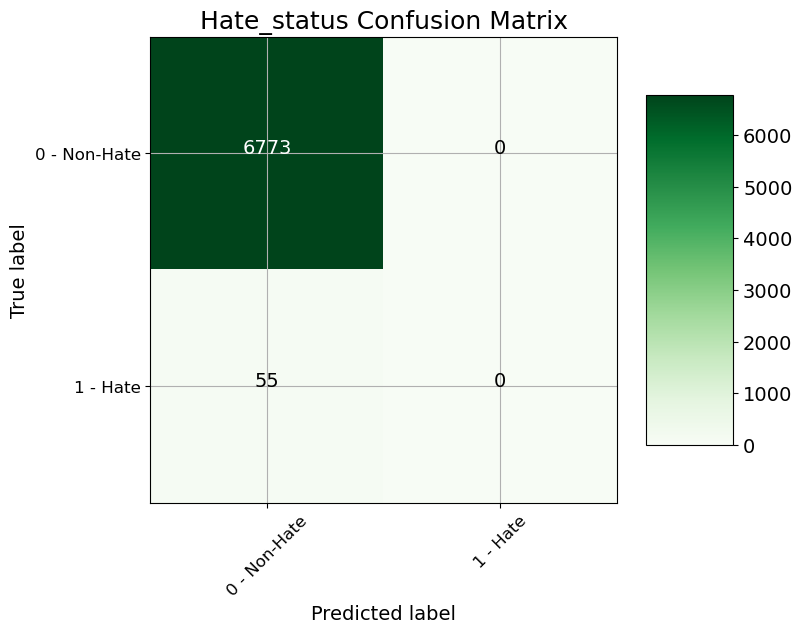

In [227]:
#Plot of Confusion Matrix
plot_confusion_matrix(confusion_matrix(test_labels,pred_best_model_rf), classes = ['0 - Non-Hate', '1 - Hate'],
                      title = 'Hate_status Confusion Matrix')

##### 1.2.5 Assessment of overfitting of the model

###### 1.2.5.1 Max depth assessment

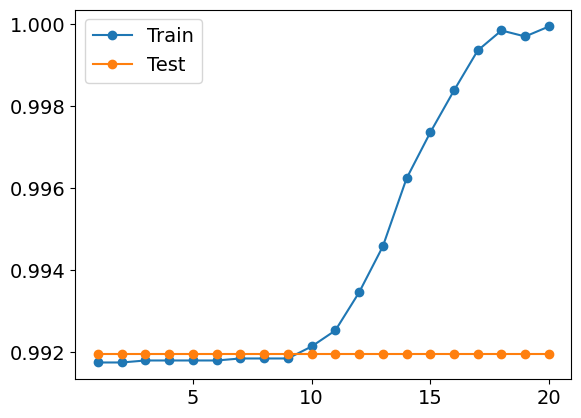

Conclusion is that the maxdepth is not determinant in increase performance of the model, since the higher the depth defined the better it addapts to the training set without increasing the generasion capacity of the model


In [145]:
# We are going to perform an analysis over the overfitting over the model taking place here
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
# evaluate a decision tree for each depth
train_scores=[]
test_scores=[]
for i in values:
 # configure the model
    model = RandomForestClassifier(max_depth=i)
 # fit model on the training dataset
    model.fit(train_features, train_labels)
 # evaluate on the train dataset
    train_yhat = model.predict(train_features)
    train_acc = accuracy_score(train_labels, train_yhat)
    train_scores.append(train_acc)
 # evaluate on the test dataset
    test_yhat = model.predict(test_features)
    test_acc = accuracy_score(test_labels, test_yhat)
    test_scores.append(test_acc)
 # summarize progress
    #print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

print('Conclusion is that the maxdepth is not determinant in increase performance of the model, since the higher the depth defined the better it addapts to the training set without increasing the generasion capacity of the model')

#Source: https://machinelearningmastery.com/overfitting-machine-learning-models/

#Bokeh

##### 1.2.6 Model optimization from oversampling and undersampling


In [228]:
#Baseline Model prior to any optimization

# Random Oversampling
rf_ros_learn =rf.fit(train_features_ros, train_labels_ros)
rf_ros_predictions=rf_ros_learn.predict(test_features)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

    #Evaluation metrics of random Oversampling
accu_rf_ros=accuracy_score(test_labels, rf_ros_predictions)
prec_rf_ros=precision_score(test_labels, rf_ros_predictions)
recall_rf_ros=recall_score(test_labels, rf_ros_predictions)
f1_rf_ros=f1_score(test_labels, rf_ros_predictions)

# SMOTE Oversampling
rf_smote_learn =rf.fit(train_features_smote, train_labels_smote)
rf_smote_predictions=rf_smote_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_rf_smote=accuracy_score(test_labels, rf_smote_predictions)
prec_rf_smote=precision_score(test_labels, rf_smote_predictions)
recall_rf_smote=recall_score(test_labels, rf_smote_predictions)
f1_rf_smote=f1_score(test_labels, rf_smote_predictions)

# Random Undersampling
rf_rus_learn =rf.fit(train_features_rus, train_labels_rus)
rf_rus_predictions=rf_rus_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_rf_rus=accuracy_score(test_labels, rf_rus_predictions)
prec_rf_rus=precision_score(test_labels, rf_rus_predictions)
recall_rf_rus=recall_score(test_labels, rf_rus_predictions)
f1_rf_rus=f1_score(test_labels, rf_rus_predictions)


# NearMiss Type 1
rf_nmiss1_learn =rf.fit(train_features_nearmiss1, train_labels_nearmiss1)
rf_nmiss1_predictions=rf_nmiss1_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_rf_nmiss1=accuracy_score(test_labels, rf_nmiss1_predictions)
prec_rf_nmiss1=precision_score(test_labels, rf_nmiss1_predictions)
recall_rf_nmiss1=recall_score(test_labels, rf_nmiss1_predictions)
f1_rf_nmiss1=f1_score(test_labels, rf_nmiss1_predictions)

# NearMiss Type 2
rf_nmiss2_learn =rf.fit(train_features_nearmiss2, train_labels_nearmiss2)
rf_nmiss2_predictions=rf_nmiss2_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_rf_nmiss2=accuracy_score(test_labels, rf_nmiss2_predictions)
prec_rf_nmiss2=precision_score(test_labels, rf_nmiss2_predictions)
recall_rf_nmiss2=recall_score(test_labels, rf_nmiss2_predictions)
f1_rf_nmiss2=f1_score(test_labels, rf_nmiss2_predictions)


# NearMiss Type 3
rf_nmiss3_learn =rf.fit(train_features_nearmiss3, train_labels_nearmiss3)
rf_nmiss3_predictions=rf_nmiss1_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_rf_nmiss3=accuracy_score(test_labels, rf_nmiss3_predictions)
prec_rf_nmiss3=precision_score(test_labels, rf_nmiss3_predictions)
recall_rf_nmiss3=recall_score(test_labels, rf_nmiss3_predictions)
f1_rf_nmiss3=f1_score(test_labels, rf_nmiss3_predictions)

#Assemble all the evaluation results in a dataset
class_balance_rf=pd.DataFrame(
    [
        [accu_rf,accu_rf_ros,accu_rf_smote,accu_rf_rus,accu_rf_nmiss1,accu_rf_nmiss2,accu_rf_nmiss3],
        [prec_rf,prec_rf_ros,prec_rf_smote,prec_rf_rus,prec_rf_nmiss1,prec_rf_nmiss2,prec_rf_nmiss3],
        [recall_rf,recall_rf_ros,recall_rf_smote,recall_rf_rus,recall_rf_nmiss1,recall_rf_nmiss2,recall_rf_nmiss3],
        [f1_rf,f1_rf_ros,f1_rf_smote,f1_rf_rus,f1_rf_nmiss1,f1_rf_nmiss2,f1_rf_nmiss3]
    ],
    columns=["Baseline","Random_Oversampling","SMOTE_Oversampling","Random_Undersampling","NearMiss1_Undersampling","NearMiss2_Undersampling","NearMiss3_Undersampling"],
    index=["Accuracy","Precision","Recall","F1_score"]
)
print(class_balance_rf)

#Perform here the plot of the ROC Curves and the AUC performance (append the AUC to the table above)


C:\Users\Casa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


           Baseline  Random_Oversampling  SMOTE_Oversampling  \
Accuracy   0.991945             0.991945            0.991798   
Precision  0.000000             0.000000            0.000000   
Recall     0.000000             0.000000            0.000000   
F1_score   0.000000             0.000000            0.000000   

           Random_Undersampling  NearMiss1_Undersampling  \
Accuracy               0.637083                 0.041301   
Precision              0.015594                 0.008034   
Recall                 0.709091                 0.963636   
F1_score               0.030516                 0.015935   

           NearMiss2_Undersampling  NearMiss3_Undersampling  
Accuracy                  0.024312                 0.510252  
Precision                 0.008042                 0.011293  
Recall                    0.981818                 0.690909  
F1_score                  0.015953                 0.022222  


<Figure size 640x480 with 0 Axes>

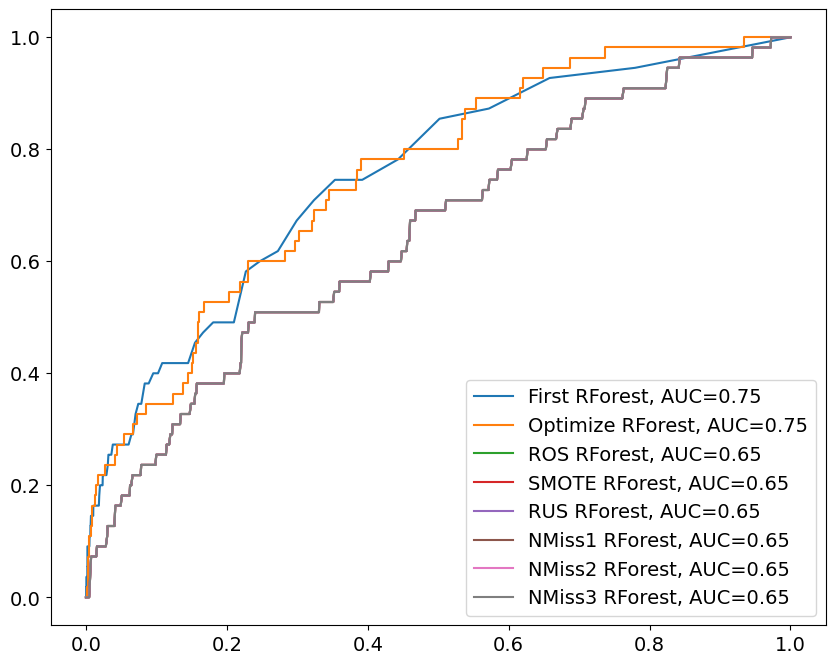

In [229]:
#Now we will plot the two models to be able to assess the two models

#set up plotting area
plt.figure(0).clf()
plt.figure(figsize = (10, 8))

#fit first random forest model and plot ROC curve
auc1 = round(metrics.roc_auc_score(test_labels, probs), 2)
plt.plot(model_fpr,model_tpr,label="First RForest, AUC="+str(auc1))

#fit optimize random forest model and plot ROC curve
auc2 = round(metrics.roc_auc_score(test_labels, probs_tune), 2)
plt.plot(model_fpr_tune, model_tpr_tune,label="Optimize RForest, AUC="+str(auc2))

#fit Random Oversampling with random forest model and plot ROC curve
probs_rf_ros = rf_ros_learn.predict_proba(test_features)[:, 1]
model_fpr_rf_ros, model_tpr_rf_ros, _ = roc_curve(test_labels, probs_rf_ros)

auc_rf_ros = round(metrics.roc_auc_score(test_labels, probs_rf_ros), 2)
plt.plot(model_fpr_rf_ros, model_tpr_rf_ros,label="ROS RForest, AUC="+str(auc_rf_ros))

#fit SMOTE Oversampling with random forest model and plot ROC curve
probs_rf_smote = rf_smote_learn.predict_proba(test_features)[:, 1]
model_fpr_rf_smote, model_tpr_rf_smote, _ = roc_curve(test_labels, probs_rf_smote)

auc_rf_smote = round(metrics.roc_auc_score(test_labels, probs_rf_smote), 2)
plt.plot(model_fpr_rf_smote, model_tpr_rf_smote,label="SMOTE RForest, AUC="+str(auc_rf_smote))

#fit Random Undersampling with random forest model and plot ROC curve
probs_rf_rus = rf_rus_learn.predict_proba(test_features)[:, 1]
model_fpr_rf_rus, model_tpr_rf_rus, _ = roc_curve(test_labels, probs_rf_rus)

auc_rf_rus = round(metrics.roc_auc_score(test_labels, probs_rf_rus), 2)
plt.plot(model_fpr_rf_rus, model_tpr_rf_rus,label="RUS RForest, AUC="+str(auc_rf_rus))


#fit Near Miss_1 Undersampling with random forest model and plot ROC curve
probs_rf_nmiss1 = rf_nmiss1_learn.predict_proba(test_features)[:, 1]
model_fpr_rf_nmiss1, model_tpr_rf_nmiss1, _ = roc_curve(test_labels, probs_rf_nmiss1)

auc_rf_nmiss1 = round(metrics.roc_auc_score(test_labels, probs_rf_nmiss1), 2)
plt.plot(model_fpr_rf_nmiss1, model_tpr_rf_nmiss1,label="NMiss1 RForest, AUC="+str(auc_rf_nmiss1))

#fit Near Miss_2 Undersampling with random forest model and plot ROC curve
probs_rf_nmiss2 = rf_nmiss2_learn.predict_proba(test_features)[:, 1]
model_fpr_rf_nmiss2, model_tpr_rf_nmiss2, _ = roc_curve(test_labels, probs_rf_nmiss2)

auc_rf_nmiss2 = round(metrics.roc_auc_score(test_labels, probs_rf_nmiss2), 2)
plt.plot(model_fpr_rf_nmiss2, model_tpr_rf_nmiss2,label="NMiss2 RForest, AUC="+str(auc_rf_nmiss2))

#fit Near Miss_3 Undersampling with random forest model and plot ROC curve
probs_rf_nmiss3 = rf_nmiss3_learn.predict_proba(test_features)[:, 1]
model_fpr_rf_nmiss3, model_tpr_rf_nmiss3, _ = roc_curve(test_labels, probs_rf_nmiss3)

auc_rf_nmiss3 = round(metrics.roc_auc_score(test_labels, probs_rf_nmiss3), 2)
plt.plot(model_fpr_rf_nmiss3, model_tpr_rf_nmiss3,label="NMiss3 RForest, AUC="+str(auc_rf_nmiss3))


#add legend
plt.legend()

#Source: https://www.statology.org/plot-multiple-roc-curves-python/

In [230]:
class_balance_rf=pd.DataFrame(
    [
        [accu_rf,accu_rf_opt,accu_rf_ros,accu_rf_smote,accu_rf_rus,accu_rf_nmiss1,accu_rf_nmiss2,accu_rf_nmiss3],
        [prec_rf,prec_rf_opt,prec_rf_ros,prec_rf_smote,prec_rf_rus,prec_rf_nmiss1,prec_rf_nmiss2,prec_rf_nmiss3],
        [recall_rf,recall_rf_opt,recall_rf_ros,recall_rf_smote,recall_rf_rus,recall_rf_nmiss1,recall_rf_nmiss2,recall_rf_nmiss3],
        [f1_rf,f1_rf_opt,f1_rf_ros,f1_rf_smote,f1_rf_rus,f1_rf_nmiss1,f1_rf_nmiss2,f1_rf_nmiss3],
        [auc1,auc2,auc_rf_ros,auc_rf_smote,auc_rf_rus,auc_rf_nmiss1,auc_rf_nmiss2,auc_rf_nmiss3]
    ],
    columns=["Baseline","Optimized","Random_Oversampling","SMOTE_Oversampling","Random_Undersampling","NearMiss1_Undersampling","NearMiss2_Undersampling","NearMiss3_Undersampling"],
    index=["Accuracy","Precision","Recall","F1_score","AUC"]
)
print(class_balance_rf)

           Baseline  Optimized  Random_Oversampling  SMOTE_Oversampling  \
Accuracy   0.991945   0.991945             0.991945            0.991798   
Precision  0.000000   0.000000             0.000000            0.000000   
Recall     0.000000   0.000000             0.000000            0.000000   
F1_score   0.000000   0.000000             0.000000            0.000000   
AUC        0.750000   0.750000             0.650000            0.650000   

           Random_Undersampling  NearMiss1_Undersampling  \
Accuracy               0.637083                 0.041301   
Precision              0.015594                 0.008034   
Recall                 0.709091                 0.963636   
F1_score               0.030516                 0.015935   
AUC                    0.650000                 0.650000   

           NearMiss2_Undersampling  NearMiss3_Undersampling  
Accuracy                  0.024312                 0.510252  
Precision                 0.008042                 0.011293  
Re

Things in dire need of improvement
    1) Once the three models pipeline is build, there is a need for doing a fullscript with all the under and oversampling techniques to check for the estimation improvements of precision and recall
    2) Find a way of see the performance for overfitting (make it for the other parameters, and by using precision and recall
    4) Perform PCA on the dataset to understand the number of optimal variables

In [ ]:
#https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
#https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0


#Perfom PCA?

### 1.3 Decision Tree

In [231]:
#from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
#import graphviz
from sklearn import tree


In [232]:
# Instantiate model with 1000 decision trees
dt = DecisionTreeClassifier(random_state = 0)

# Train the model on training data
dt_learn =dt.fit(train_features, train_labels)

# Use the dt predict method on the test data
dt_predictions = dt_learn.predict(test_features)

#tree.plot_tree(dt_learn, feature_names=features_dt_labels) #(put above this variable in each dataset)


#data_1dataset = tree.export_graphviz(dt_learn, out_file=None) 
#graph_dt = graphviz.Source(data_1dataset) 
#graph_dt.render("tree") 

#Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
        #https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

##### 1.2.1 Evaluation

###### 1.2.1.1 Assessment Variables

In [233]:
#Now we are to create the classification and matrix table 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_labels, dt_predictions))
print(classification_report(test_labels, dt_predictions))

[[6708   65]
 [  47    8]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6773
           1       0.11      0.15      0.12        55

    accuracy                           0.98      6828
   macro avg       0.55      0.57      0.56      6828
weighted avg       0.99      0.98      0.98      6828



In [234]:
#Lets define the variables for the model assessment
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accu_dt=accuracy_score(test_labels, dt_predictions)
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
prec_dt=precision_score(test_labels, dt_predictions)
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
recall_dt=recall_score(test_labels, dt_predictions)
#The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
#F1 = 2 * (precision * recall) / (precision + recall)
f1_dt=f1_score(test_labels, dt_predictions)
print(f'The current model possesses the accuracy of  {accu_dt}, precision of {prec_dt}, recall of {recall_dt}, and f1 measures of recall {f1_dt} \n With a precision value of zero, no true positive was predicted')


The current model possesses the accuracy of  0.9835969537199766, precision of 0.1095890410958904, recall of 0.14545454545454545, and f1 measures of recall 0.125 
 With a precision value of zero, no true positive was predicted


###### 1.2.1.2 ROC Curve

In [235]:
## ROC Curve
#Make probability predictions
train_probs = dt_learn.predict_proba(train_features)[:,1] 
probs = dt_learn.predict_proba(test_features)[:, 1]
train_predictions = dt_learn.predict(train_features)

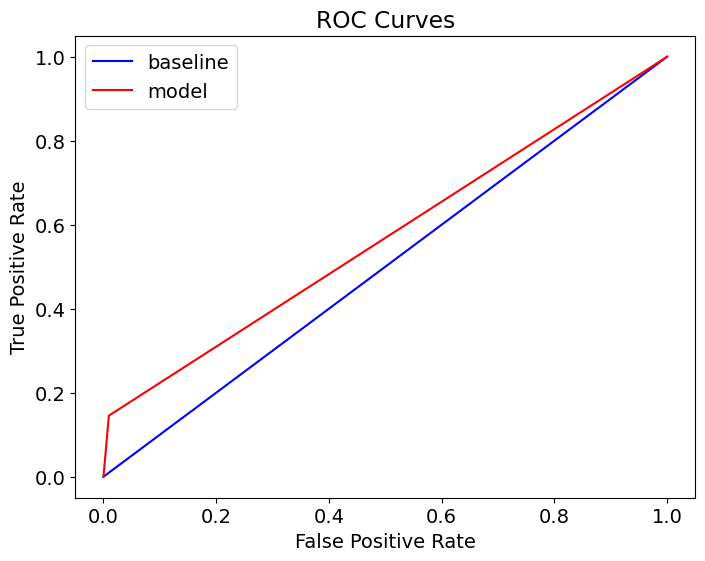

1.0
0.56792880823591


In [236]:
#Lets now plot a Roc curve from the decision model
    #Still need to properly save the auc variables
    #Still in need of writting conclusions
    #Still in need to see the overfitting effect (find a way of seeing)

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
model_fpr, model_tpr, _ = roc_curve(test_labels, probs)
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 14
    # Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.plot(model_fpr, model_tpr, 'r', label = 'model')
plt.legend();
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
plt.show();

#Respective Area under the curve
print(roc_auc_score(train_labels, train_probs))
print(roc_auc_score(test_labels, probs))
#Source: https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f
        # https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

###### 1.2.1.3 Confusion Matrix

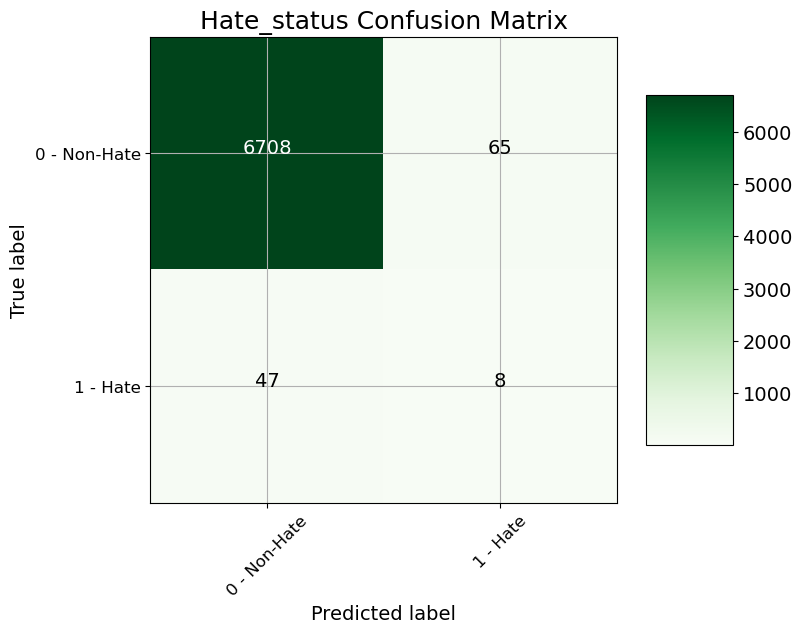

In [237]:
#Perform a confusion matrix clean and presentable as well

import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 18)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, size = 12)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 14,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 14)
    plt.xlabel('Predicted label', size = 14)
    
# Let's plot it out
cm = confusion_matrix(test_labels, dt_predictions)
plot_confusion_matrix(cm, classes = ['0 - Non-Hate', '1 - Hate'],
                      title = 'Hate_status Confusion Matrix')
#Source: https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f
        #(last point on the evaluation

##### 1.2.3 Feature Importance

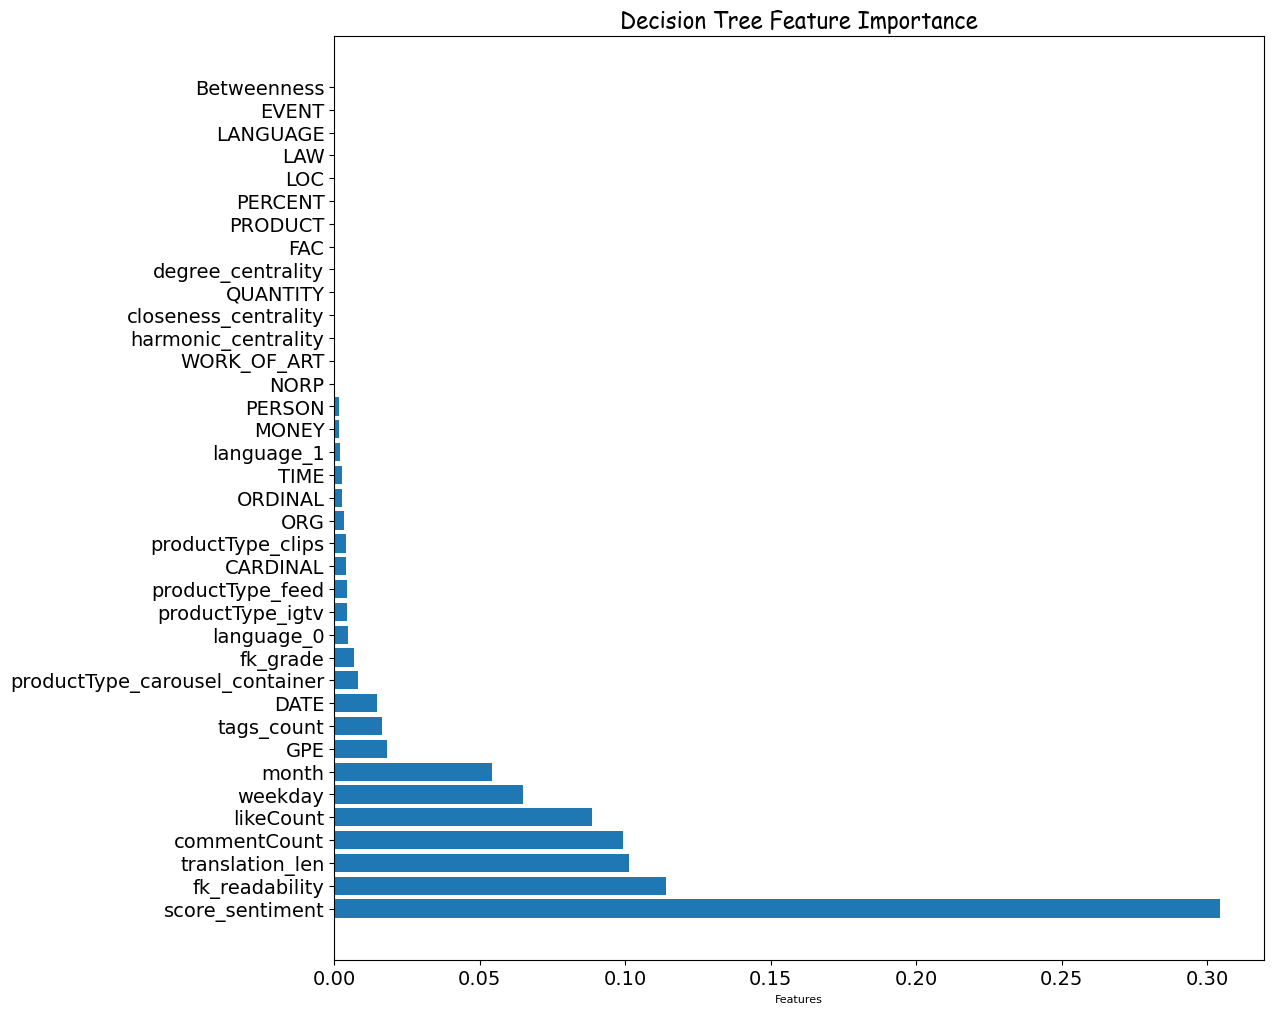

In [239]:
# Feature Importance
import pandas as pd
fi = pd.DataFrame({'feature': list(train_features.columns),
                   'importance': dt_learn.feature_importances_}).\
                    sort_values('importance', ascending = False)
#print(fi.head())

# Plot the top 25 feature importance
#feature_names_4 = [i[0] for i in feature_importances_ranked[:3]]
#y_ticks = np.arange(0, len(feature_names_4))
#x_axis = [i[1] for i in feature_importances_ranked[:3]]
plt.figure(figsize = (12, 12))
plt.barh(fi.feature, fi.importance)   #horizontal barplot
plt.title('Decision Tree Feature Importance',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 16})
plt.xlabel('Features',fontdict= {'fontsize' : 8})
plt.show()

Feature Importance: Clearly the feature that more contributes is the fealing associated to it, being afterwards the tags_rank_avg (possibily the tags that once input on comment, the more refered is, the more it contributes for the hate speech recognition

##### 1.2.4 Tune the hyperparameters

In [240]:
#What parameters are currently being used by the 
from pprint import pprint
print('Parameters currently in use:\n')
pprint(dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}


In [241]:
# Creation of the variables to than better maximize the respective models 
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 50)]
max_features = ['auto', 'log2']  # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]   # Maximum number of levels in tree
#max_depth.append(None)
min_samples_split = [2, 5, 10]  # Minimum number of samples required to split a node
min_samples_leaf = [1, 4, 10]    # Minimum number of samples required at each leaf node
#bootstrap = [True, False]       # Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),}
seed=50 #metodo para calcular da mesma forma gravar a seed para não ter valores diferentes

In [242]:
#Não estou a conseguir fazer esta parte

from sklearn.tree import DecisionTreeClassifier
dt_1 = DecisionTreeClassifier(random_state = 42)
dt_random = RandomizedSearchCV(
                estimator = dt_1,
                param_distributions = random_grid,
                n_iter = 50, cv = 3,
                verbose=1, random_state=seed,
                scoring='roc_auc')
dt_random.fit(train_features, train_labels)
dt_random.best_params_

#pipe_random = make_pipeline(col_trans, dt_random)
#pipe_random.fit(X_train, y_train)
#dt_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 11,
 'max_features': 'auto',
 'max_depth': 50}

In [243]:
#Lets check which hyperparameters where we need to optimize
optimize=pd.DataFrame(dt_random.best_params_,index=[0])
before_optimize=pd.DataFrame(dt.get_params(),index=[0])
optimize1=pd.concat([optimize,before_optimize.set_index(optimize.index)])
#tags_split=pd.concat([tags_base,tag_3.set_index(tags_base.index)],axis=1)
optimize1.head(5)

,min_samples_split,min_samples_leaf,max_leaf_nodes,max_features,max_depth,ccp_alpha,class_weight,criterion,min_impurity_decrease,min_weight_fraction_leaf,random_state,splitter
0,5,1,11,auto,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2,1,None,None,None,0.0,None,gini,0.0,0.0,0.0,best


In [244]:
# Use the best model after tuning and predict
best_model_dt = dt_random.best_estimator_
best_model_dt.fit(train_features, train_labels)
pred_best_model_dt = best_model_dt.predict(test_features)

In [245]:
#Confusion Matrix and evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_labels, pred_best_model_dt))
print(classification_report(test_labels, pred_best_model_dt))
#Still missing a table to store the calculation of the values

[[6773    0]
 [  55    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6773
           1       0.00      0.00      0.00        55

    accuracy                           0.99      6828
   macro avg       0.50      0.50      0.50      6828
weighted avg       0.98      0.99      0.99      6828



C:\Users\Casa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Casa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Casa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


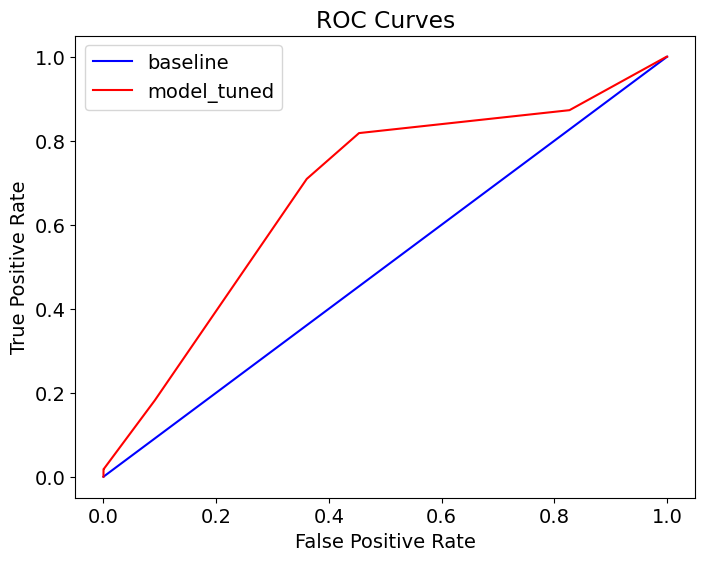

0.7434638176530299
0.6778921654161577


In [246]:
#ROC curve
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_probs_tune_dt = best_model_dt.predict_proba(train_features)[:,1] 
probs_tune_dt = best_model_dt.predict_proba(test_features)[:, 1]
train_predictions_tune = best_model_dt.predict(train_features)


base_fpr_tune_dt, base_tpr_tune_dt, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
model_fpr_tune_dt, model_tpr_tune_dt, _ = roc_curve(test_labels, probs_tune_dt)
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 14
    # Plot both curves
plt.plot(base_fpr_tune_dt, base_tpr_tune_dt, 'b', label = 'baseline')
plt.plot(model_fpr_tune_dt, model_tpr_tune_dt, 'r', label = 'model_tuned')
plt.legend();
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate'); 
plt.title('ROC Curves');
plt.show();

#Respective Area under the curve
print(roc_auc_score(train_labels, train_probs_tune_dt))
print(roc_auc_score(test_labels, probs_tune_dt))
#Source: https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f
        # https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
        # https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f

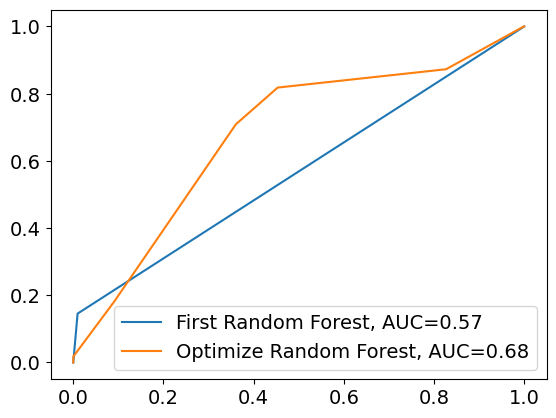

In [247]:
#Now we will plot the two models to be able to assess the two models

#set up plotting area
plt.figure(0).clf()

#fit first random forest model and plot ROC curve
auc_dt = round(metrics.roc_auc_score(test_labels, probs), 2)
plt.plot(model_fpr,model_tpr,label="First Random Forest, AUC="+str(auc_dt))

#fit optimize random forest model and plot ROC curve
auc_tune_dt = round(metrics.roc_auc_score(test_labels, probs_tune_dt), 2)
plt.plot(model_fpr_tune_dt, model_tpr_tune_dt,label="Optimize Random Forest, AUC="+str(auc_tune_dt))

#add legend
plt.legend()

#Fazer uma analise sobre custo do negocio de false positives para perceber 
#Source: https://www.statology.org/plot-multiple-roc-curves-python/

In [248]:
print(f'Conclusion: There is an improvement for the fine tuned model from and AUC = {round(roc_auc_score(test_labels, probs),2)}, to a AUC =  {round(roc_auc_score(test_labels, probs_tune_dt),2)}')

Conclusion: There is an improvement for the fine tuned model from and AUC = 0.57, to a AUC =  0.68


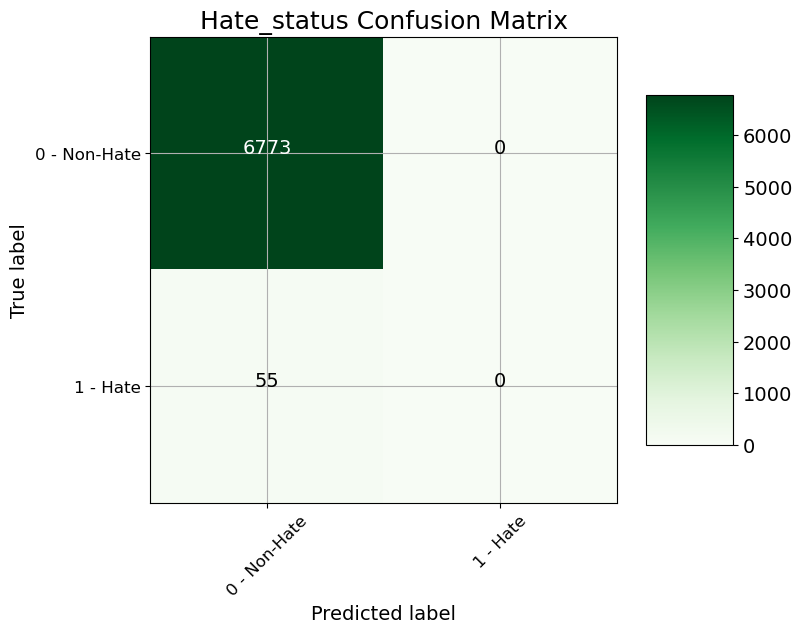

In [249]:
#Plot of Confusion Matrix
plot_confusion_matrix(confusion_matrix(test_labels, pred_best_model_dt), classes = ['0 - Non-Hate', '1 - Hate'],
                      title = 'Hate_status Confusion Matrix')

##### 1.2.5 Assessment of overfitting of the model

###### 1.2.5.1 Max depth assessment

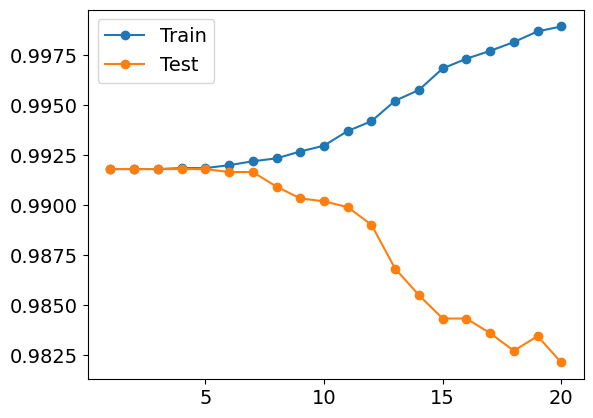

Conclusion is that the maxdepth is not determinant in increase performance of the model, since the higher the depth defined the better it addapts to the training set without increasing the generasion capacity of the model


In [66]:
# We are going to perform an analysis over the overfitting over the model taking place here
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
# evaluate a decision tree for each depth
train_scores=[]
test_scores=[]
for i in values:
 # configure the model
    model = DecisionTreeClassifier(max_depth=i)
 # fit model on the training dataset
    model.fit(train_features, train_labels)
 # evaluate on the train dataset
    train_yhat = model.predict(train_features)
    train_acc = accuracy_score(train_labels, train_yhat)
    train_scores.append(train_acc)
 # evaluate on the test dataset
    test_yhat = model.predict(test_features)
    test_acc = accuracy_score(test_labels, test_yhat)
    test_scores.append(test_acc)
 # summarize progress
    #print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

print('Conclusion is that the maxdepth is not determinant in increase performance of the model, since the higher the depth defined the better it addapts to the training set without increasing the generasion capacity of the model')

#Source: https://machinelearningmastery.com/overfitting-machine-learning-models/

#Bokeh

##### 1.2.6 Model optimization from oversampling and undersampling


In [250]:
#Baseline Model prior to any optimization
accu_dt_opt=accuracy_score(test_labels, pred_best_model_dt)
prec_dt_opt=precision_score(test_labels, pred_best_model_dt)
recall_dt_opt=recall_score(test_labels, pred_best_model_dt)
f1_dt_opt=f1_score(test_labels, pred_best_model_dt)


# Random Oversampling
dt_ros_learn =dt.fit(train_features_ros, train_labels_ros)
dt_ros_predictions=dt_ros_learn.predict(test_features)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

    #Evaluation metrics of random Oversampling
accu_dt_ros=accuracy_score(test_labels, dt_ros_predictions)
prec_dt_ros=precision_score(test_labels, dt_ros_predictions)
recall_dt_ros=recall_score(test_labels, dt_ros_predictions)
f1_dt_ros=f1_score(test_labels, dt_ros_predictions)

# SMOTE Oversampling
dt_smote_learn =dt.fit(train_features_smote, train_labels_smote)
dt_smote_predictions=dt_smote_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_dt_smote=accuracy_score(test_labels, dt_smote_predictions)
prec_dt_smote=precision_score(test_labels, dt_smote_predictions)
recall_dt_smote=recall_score(test_labels, dt_smote_predictions)
f1_dt_smote=f1_score(test_labels, dt_smote_predictions)

# Random Undersampling
dt_rus_learn =dt.fit(train_features_rus, train_labels_rus)
dt_rus_predictions=dt_rus_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_dt_rus=accuracy_score(test_labels, dt_rus_predictions)
prec_dt_rus=precision_score(test_labels, dt_rus_predictions)
recall_dt_rus=recall_score(test_labels, dt_rus_predictions)
f1_dt_rus=f1_score(test_labels, dt_rus_predictions)


# NearMiss Type 1
dt_nmiss1_learn =dt.fit(train_features_nearmiss1, train_labels_nearmiss1)
dt_nmiss1_predictions=dt_nmiss1_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_dt_nmiss1=accuracy_score(test_labels, dt_nmiss1_predictions)
prec_dt_nmiss1=precision_score(test_labels, dt_nmiss1_predictions)
recall_dt_nmiss1=recall_score(test_labels, dt_nmiss1_predictions)
f1_dt_nmiss1=f1_score(test_labels, dt_nmiss1_predictions)

# NearMiss Type 2
dt_nmiss2_learn =dt.fit(train_features_nearmiss2, train_labels_nearmiss2)
dt_nmiss2_predictions=dt_nmiss2_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_dt_nmiss2=accuracy_score(test_labels, dt_nmiss2_predictions)
prec_dt_nmiss2=precision_score(test_labels, dt_nmiss2_predictions)
recall_dt_nmiss2=recall_score(test_labels, dt_nmiss2_predictions)
f1_dt_nmiss2=f1_score(test_labels, dt_nmiss2_predictions)


# NearMiss Type 3
dt_nmiss3_learn =dt.fit(train_features_nearmiss3, train_labels_nearmiss3)
dt_nmiss3_predictions=dt_nmiss1_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_dt_nmiss3=accuracy_score(test_labels, dt_nmiss3_predictions)
prec_dt_nmiss3=precision_score(test_labels, dt_nmiss3_predictions)
recall_dt_nmiss3=recall_score(test_labels, dt_nmiss3_predictions)
f1_dt_nmiss3=f1_score(test_labels, dt_nmiss3_predictions)

#Assemble all the evaluation results in a dataset
class_balance_dt=pd.DataFrame(
    [
        [accu_dt,accu_dt_opt,accu_dt_ros,accu_dt_smote,accu_dt_rus,accu_dt_nmiss1,accu_dt_nmiss2,accu_dt_nmiss3],
        [prec_dt,prec_dt_opt,prec_dt_ros,prec_dt_smote,prec_dt_rus,prec_dt_nmiss1,prec_dt_nmiss2,prec_dt_nmiss3],
        [recall_dt,recall_dt_opt,recall_dt_ros,recall_dt_smote,recall_dt_rus,recall_dt_nmiss1,recall_dt_nmiss2,recall_dt_nmiss3],
        [f1_dt,f1_dt_opt,f1_dt_ros,f1_dt_smote,f1_dt_rus,f1_dt_nmiss1,f1_dt_nmiss2,f1_dt_nmiss3]
    ],
    columns=["Baseline","Optimize","Random_Oversampling","SMOTE_Oversampling","Random_Undersampling","NearMiss1_Undersampling","NearMiss2_Undersampling","NearMiss3_Undersampling"],
    index=["Accuracy","Precision","Recall","F1_score"]
)
print(class_balance)

#Perform here the plot of the ROC Curves and the AUC performance (append the AUC to the table above)


C:\Users\Casa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


           Baseline  Random_Oversampling  SMOTE_Oversampling  \
Accuracy   0.991945             0.654511            0.860281   
Precision  0.000000             0.009787            0.005501   
Recall     0.000000             0.418182            0.090909   
F1_score   0.000000             0.019127            0.010373   

           Random_Undersampling  NearMiss1_Undersampling  \
Accuracy               0.375366                 0.073814   
Precision              0.009095                 0.008159   
Recall                 0.709091                 0.945455   
F1_score               0.017960                 0.016179   

           NearMiss2_Undersampling  NearMiss3_Undersampling  
Accuracy                  0.050234                 0.214997  
Precision                 0.007958                 0.008705  
Recall                    0.945455                 0.854545  
F1_score                  0.015784                 0.017235  


<Figure size 640x480 with 0 Axes>

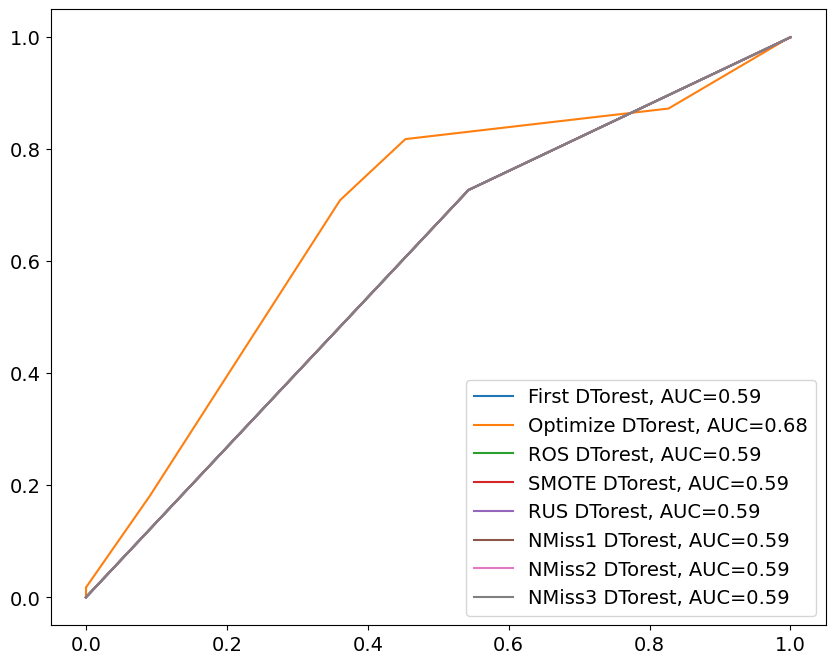

In [251]:
#Now we will plot the two models to be able to assess the two models

#set up plotting area
plt.figure(0).clf()
plt.figure(figsize = (10, 8))

#fit first model and plot ROC curve
probs_dt = dt_learn.predict_proba(test_features)[:, 1]
model_fpr_dt, model_tpr_dt, _ = roc_curve(test_labels, probs_dt)

auc_dt = round(metrics.roc_auc_score(test_labels, probs_dt), 2)
plt.plot(model_fpr_dt,model_tpr_dt,label="First DTorest, AUC="+str(auc_dt))

#fit optimize model and plot ROC curve
auc_tune_dt = round(metrics.roc_auc_score(test_labels, probs_tune_dt), 2)
plt.plot(model_fpr_tune_dt, model_tpr_tune_dt,label="Optimize DTorest, AUC="+str(auc_tune_dt))


#fit Random Oversampling with model and plot ROC curve
probs_dt_ros = dt_ros_learn.predict_proba(test_features)[:, 1]
model_fpr_dt_ros, model_tpr_dt_ros, _ = roc_curve(test_labels, probs_dt_ros)

auc_dt_ros = round(metrics.roc_auc_score(test_labels, probs_dt_ros), 2)
plt.plot(model_fpr_dt_ros, model_tpr_dt_ros,label="ROS DTorest, AUC="+str(auc_dt_ros))

#fit SMOTE Oversampling with  model and plot ROC curve
probs_dt_smote = dt_smote_learn.predict_proba(test_features)[:, 1]
model_fpr_dt_smote, model_tpr_dt_smote, _ = roc_curve(test_labels, probs_dt_smote)

auc_dt_smote = round(metrics.roc_auc_score(test_labels, probs_dt_smote), 2)
plt.plot(model_fpr_dt_smote, model_tpr_dt_smote,label="SMOTE DTorest, AUC="+str(auc_dt_smote))

#fit Random Undersampling with  model and plot ROC curve
probs_dt_rus = dt_rus_learn.predict_proba(test_features)[:, 1]
model_fpr_dt_rus, model_tpr_dt_rus, _ = roc_curve(test_labels, probs_dt_rus)

auc_dt_rus = round(metrics.roc_auc_score(test_labels, probs_dt_rus), 2)
plt.plot(model_fpr_dt_rus, model_tpr_dt_rus,label="RUS DTorest, AUC="+str(auc_dt_rus))


#fit Near Miss_1 Undersampling with  model and plot ROC curve
probs_dt_nmiss1 = dt_nmiss1_learn.predict_proba(test_features)[:, 1]
model_fpr_dt_nmiss1, model_tpr_dt_nmiss1, _ = roc_curve(test_labels, probs_dt_nmiss1)

auc_dt_nmiss1 = round(metrics.roc_auc_score(test_labels, probs_dt_nmiss1), 2)
plt.plot(model_fpr_dt_nmiss1, model_tpr_dt_nmiss1,label="NMiss1 DTorest, AUC="+str(auc_dt_nmiss1))

#fit Near Miss_2 Undersampling with  model and plot ROC curve
probs_dt_nmiss2 = dt_nmiss2_learn.predict_proba(test_features)[:, 1]
model_fpr_dt_nmiss2, model_tpr_dt_nmiss2, _ = roc_curve(test_labels, probs_dt_nmiss2)

auc_dt_nmiss2 = round(metrics.roc_auc_score(test_labels, probs_dt_nmiss2), 2)
plt.plot(model_fpr_dt_nmiss2, model_tpr_dt_nmiss2,label="NMiss2 DTorest, AUC="+str(auc_dt_nmiss2))

#fit Near Miss_3 Undersampling with  model and plot ROC curve
probs_dt_nmiss3 = dt_nmiss3_learn.predict_proba(test_features)[:, 1]
model_fpr_dt_nmiss3, model_tpr_dt_nmiss3, _ = roc_curve(test_labels, probs_dt_nmiss3)

auc_dt_nmiss3 = round(metrics.roc_auc_score(test_labels, probs_dt_nmiss3), 2)
plt.plot(model_fpr_dt_nmiss3, model_tpr_dt_nmiss3,label="NMiss3 DTorest, AUC="+str(auc_dt_nmiss3))


#add legend
plt.legend()

#Source: https://www.statology.org/plot-multiple-roc-curves-python/

In [252]:
#Assemble all the evaluation results in a dataset
class_balance_dt=pd.DataFrame(
    [
        [accu_dt,accu_dt_opt,accu_dt_ros,accu_dt_smote,accu_dt_rus,accu_dt_nmiss1,accu_dt_nmiss2,accu_dt_nmiss3],
        [prec_dt,prec_dt_opt,prec_dt_ros,prec_dt_smote,prec_dt_rus,prec_dt_nmiss1,prec_dt_nmiss2,prec_dt_nmiss3],
        [recall_dt,recall_dt_opt,recall_dt_ros,recall_dt_smote,recall_dt_rus,recall_dt_nmiss1,recall_dt_nmiss2,recall_dt_nmiss3],
        [f1_dt,f1_dt_opt,f1_dt_ros,f1_dt_smote,f1_dt_rus,f1_dt_nmiss1,f1_dt_nmiss2,f1_dt_nmiss3],
        [auc_dt,auc_tune_dt,auc_dt_ros,auc_dt_smote,auc_dt_rus,auc_dt_nmiss1,auc_dt_nmiss2,auc_dt_nmiss3]
    ],
    columns=["Baseline","Optimize","Random_Oversampling","SMOTE_Oversampling","Random_Undersampling","NearMiss1_Undersampling","NearMiss2_Undersampling","NearMiss3_Undersampling"],
    index=["Accuracy","Precision","Recall","F1_score","AUC"]
)
print(class_balance_dt)

           Baseline  Optimize  Random_Oversampling  SMOTE_Oversampling  \
Accuracy   0.983597  0.991945             0.982865            0.977885   
Precision  0.109589  0.000000             0.069444            0.029412   
Recall     0.145455  0.000000             0.090909            0.054545   
F1_score   0.125000  0.000000             0.078740            0.038217   
AUC        0.590000  0.680000             0.590000            0.590000   

           Random_Undersampling  NearMiss1_Undersampling  \
Accuracy               0.635325                 0.034124   
Precision              0.014747                 0.007975   
Recall                 0.672727                 0.963636   
F1_score               0.028861                 0.015819   
AUC                    0.590000                 0.590000   

           NearMiss2_Undersampling  NearMiss3_Undersampling  
Accuracy                  0.018600                 0.459139  
Precision                 0.007995                 0.010758  
Recall  

### 1.4 Logistic Regression

In [255]:
#from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [257]:
# Instantiate model with 1000 decision trees
LR = LogisticRegression()
# Train the model on training data
LR_learn =LR.fit(train_features, train_labels)

# Use the LR predict method on the test data
LR_predictions = LR_learn.predict(test_features)


C:\Users\Casa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 1.2.1 Evaluation

###### 1.2.1.1 Assessment Variables

In [258]:
#Now we are to create the classification and matrix table 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_labels, LR_predictions))
print(classification_report(test_labels, LR_predictions))

[[6768    5]
 [  55    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6773
           1       0.00      0.00      0.00        55

    accuracy                           0.99      6828
   macro avg       0.50      0.50      0.50      6828
weighted avg       0.98      0.99      0.99      6828



In [259]:
#Lets define the variables for the model assessment
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accu_LR=accuracy_score(test_labels, LR_predictions)
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
prec_LR=precision_score(test_labels, LR_predictions)
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
recall_LR=recall_score(test_labels, LR_predictions)
#The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
#F1 = 2 * (precision * recall) / (precision + recall)
f1_LR=f1_score(test_labels, LR_predictions)
print(f'The current model possesses the accuracy of  {accu_LR}, precision of {prec_LR}, recall of {recall_LR}, and f1 measures of recall {f1_LR} \n With a precision value of zero, no true positive was predicted')


The current model possesses the accuracy of  0.9912126537785588, precision of 0.0, recall of 0.0, and f1 measures of recall 0.0 
 With a precision value of zero, no true positive was predicted


###### 1.2.1.2 ROC Curve

In [260]:
## ROC Curve
#Make probability predictions
train_probs = LR_learn.predict_proba(train_features)[:,1] 
probs = LR_learn.predict_proba(test_features)[:, 1]
train_predictions = LR_learn.predict(train_features)

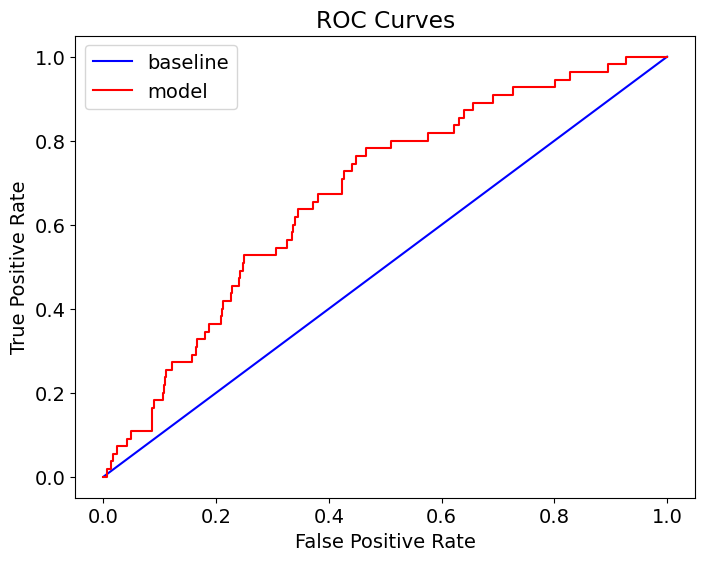

0.7148759114945525
0.6756318537508555


In [261]:
#Lets now plot a Roc curve from the decision model
    #Still need to properly save the auc variables
    #Still in need of writting conclusions
    #Still in need to see the overfitting effect (find a way of seeing)

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
model_fpr, model_tpr, _ = roc_curve(test_labels, probs)
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 14
    # Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.plot(model_fpr, model_tpr, 'r', label = 'model')
plt.legend();
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
plt.show();

#Respective Area under the curve
print(roc_auc_score(train_labels, train_probs))
print(roc_auc_score(test_labels, probs))
#Source: https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f
        # https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

###### 1.2.1.3 Confusion Matrix

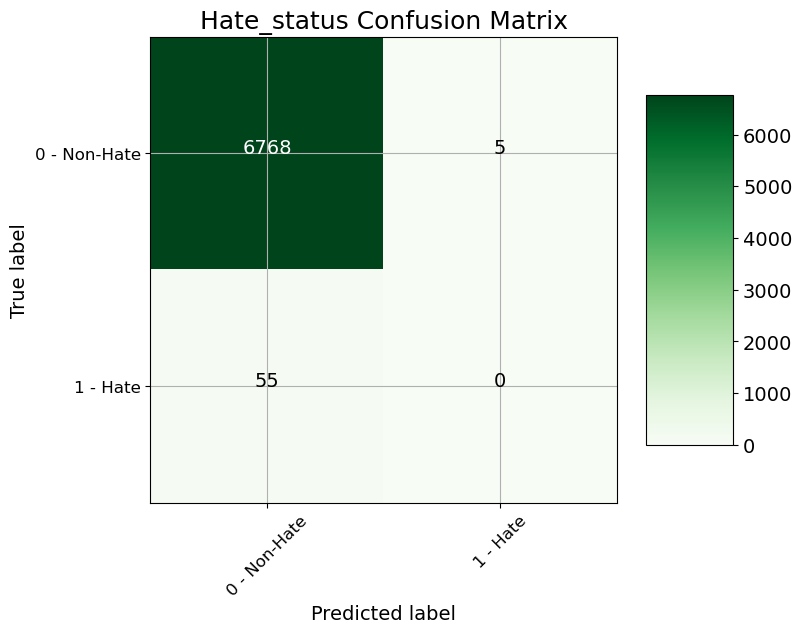

In [262]:
#Perform a confusion matrix clean and presentable as well

import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 18)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, size = 12)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 14,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 14)
    plt.xlabel('Predicted label', size = 14)
    
# Let's plot it out
cm = confusion_matrix(test_labels, LR_predictions)
plot_confusion_matrix(cm, classes = ['0 - Non-Hate', '1 - Hate'],
                      title = 'Hate_status Confusion Matrix')
#Source: https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f
        #(last point on the evaluation

##### 1.2.3 Feature Importance

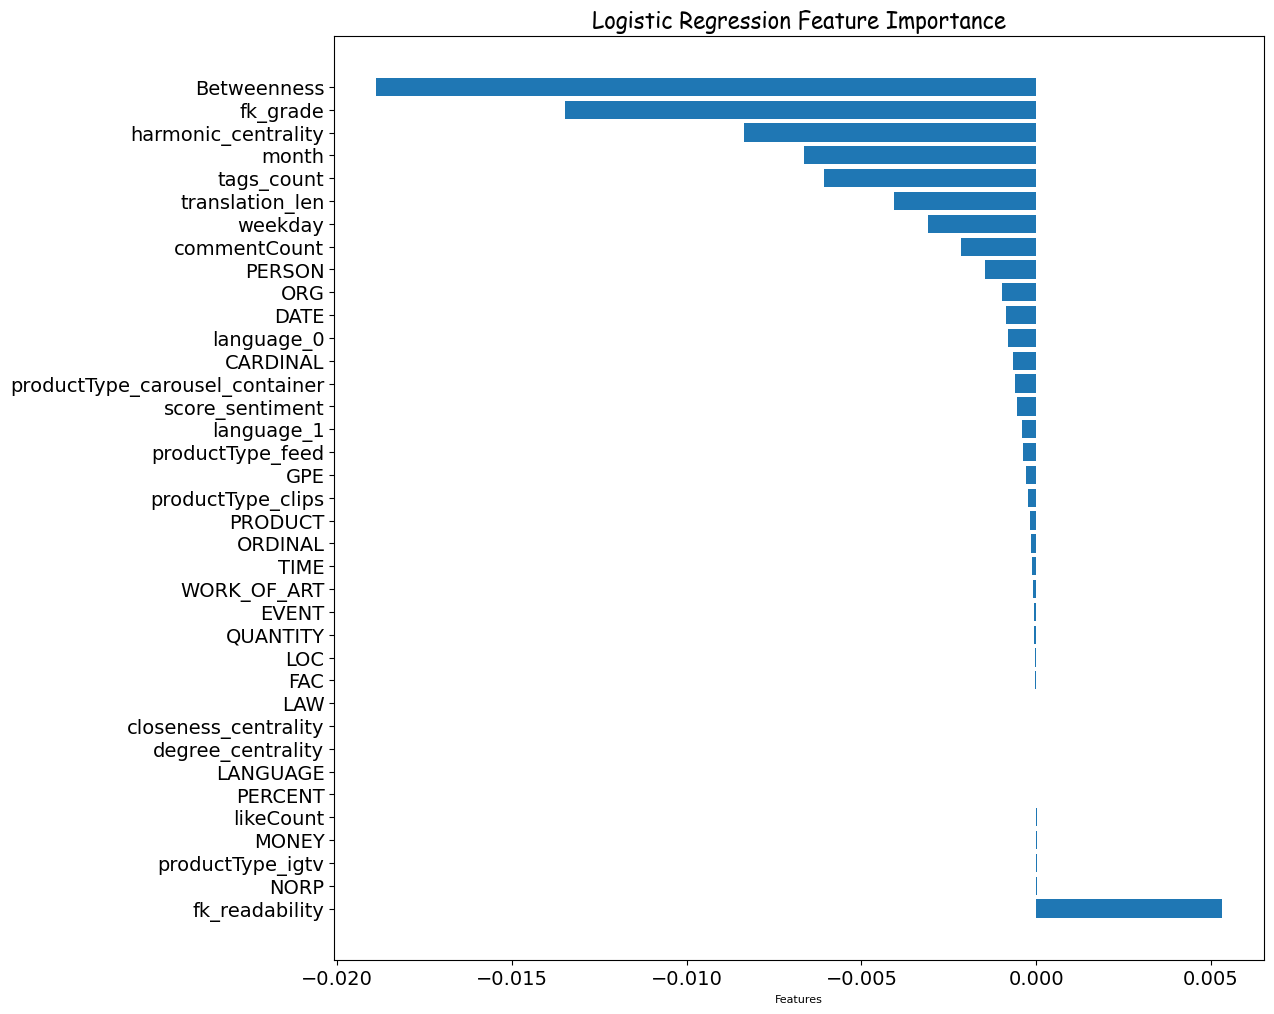

In [264]:
# Feature Importance
import pandas as pd
fi = pd.DataFrame({'feature': list(train_features.columns),
                   'importance': LR_learn.coef_[0]}).\
                    sort_values('importance', ascending = False)
#print(fi.head())

# Plot the top 25 feature importance
#feature_names_4 = [i[0] for i in feature_importances_ranked[:3]]
#y_ticks = np.arange(0, len(feature_names_4))
#x_axis = [i[1] for i in feature_importances_ranked[:3]]
plt.figure(figsize = (12, 12))
plt.barh(fi.feature, fi.importance)   #horizontal barplot
plt.title('Logistic Regression Feature Importance',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 16})
plt.xlabel('Features',fontdict= {'fontsize' : 8})
plt.show()

##### 1.2.4 Tune the hyperparameters

In [265]:
#What parameters are currently being used by the 
from pprint import pprint
print('Parameters currently in use:\n')
pprint(LR.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [266]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python

In [267]:
# Creation of the variables to than better maximize the respective models 
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 700, num = 50)]
penalty = ['l1', 'l2']  # Number of features to consider at every split
warm_start = [True, False]
max_iter = [20, 50, 100]
fit_intercept = [True, False]
intercept_scaling = [0, 1]

random_grid = {'penalty': penalty,
              'warm_start': warm_start,
              'max_iter': max_iter,
              'fit_intercept': fit_intercept,
              'intercept_scaling': intercept_scaling}

#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),}


seed=50 #metodo para calcular da mesma forma gravar a seed para não ter valores diferentes

In [268]:
#Não estou a conseguir fazer esta parte

from sklearn.linear_model import LogisticRegression
LR_1 = LogisticRegression(random_state = 42)
LR_random = RandomizedSearchCV(
                    estimator = LR_1,
                param_distributions = random_grid,
                n_iter = 50, cv = 3,
                verbose=1, random_state=seed,
                scoring='roc_auc')
LR_random.fit(train_features, train_labels)
LR_random.best_params_

#pipe_random = make_pipeline(col_trans, dt_random)
#pipe_random.fit(X_train, y_train)
#dt_random.best_params_

C:\Users\Casa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Casa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Casa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as

Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\Casa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Casa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

{'warm_start': True,
 'penalty': 'l2',
 'max_iter': 100,
 'intercept_scaling': 0,
 'fit_intercept': False}

In [269]:
#Lets check which hyperparameters where we need to optimize
optimize=pd.DataFrame(LR_random.best_params_,index=[0])
before_optimize=pd.DataFrame(LR.get_params(),index=[0])
optimize1=pd.concat([optimize,before_optimize.set_index(optimize.index)])
#tags_split=pd.concat([tags_base,tag_3.set_index(tags_base.index)],axis=1)
optimize1.head(5)

,warm_start,penalty,max_iter,intercept_scaling,fit_intercept,C,class_weight,dual,l1_ratio,multi_class,n_jobs,random_state,solver,tol,verbose
0,True,l2,100,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,False,l2,100,1,True,1.0,None,False,None,auto,None,None,lbfgs,0.0001,0.0


In [270]:
# Use the best model after tuning and predict
best_model_lr = LR_random.best_estimator_
best_model_lr.fit(train_features, train_labels)
pred_best_model_lr = best_model_lr.predict(test_features)

In [271]:
#Confusion Matrix and evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_labels, pred_best_model_lr))
print(classification_report(test_labels, pred_best_model_lr))
#Still missing a table to store the calculation of the values

[[6772    1]
 [  55    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6773
           1       0.00      0.00      0.00        55

    accuracy                           0.99      6828
   macro avg       0.50      0.50      0.50      6828
weighted avg       0.98      0.99      0.99      6828



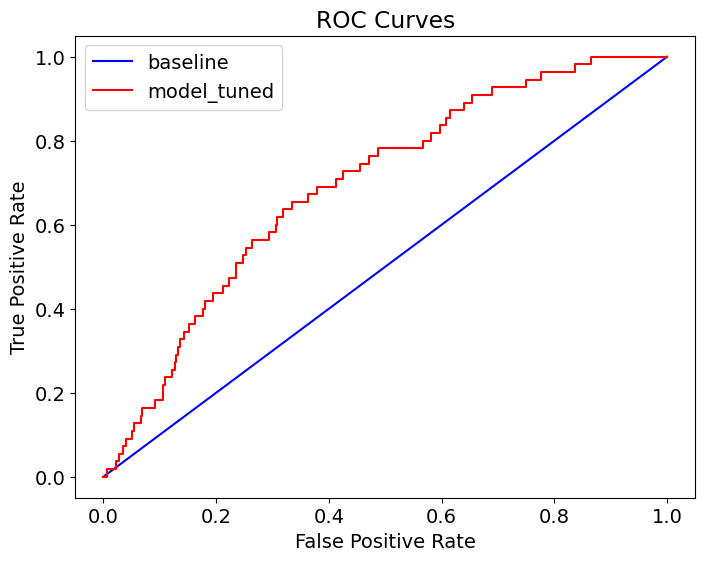

0.7337196550774998
0.6938727299571829


In [272]:
#ROC curve
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_probs_tune_lr = best_model_lr.predict_proba(train_features)[:,1] 
probs_tune_lr = best_model_lr.predict_proba(test_features)[:, 1]
train_predictions_tune_lr = best_model_lr.predict(train_features)


base_fpr_tune_lr, base_tpr_tune_lr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
model_fpr_tune_lr, model_tpr_tune_lr, _ = roc_curve(test_labels, probs_tune_lr)
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 14
    # Plot both curves
plt.plot(base_fpr_tune_lr, base_tpr_tune_lr, 'b', label = 'baseline')
plt.plot(model_fpr_tune_lr, model_tpr_tune_lr, 'r', label = 'model_tuned')
plt.legend();
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate'); 
plt.title('ROC Curves');
plt.show();

#Respective Area under the curve
print(roc_auc_score(train_labels, train_probs_tune_lr))
print(roc_auc_score(test_labels, probs_tune_lr))
#Source: https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f
        # https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
        # https://towardsdatascience.com/my-random-forest-classifier-cheat-sheet-in-python-fedb84f8cf4f

In [273]:
print(f'Conclusion: There is an regression for the fine tuned model from and AUC = {round(roc_auc_score(test_labels, probs),2)}, to a AUC =  {round(roc_auc_score(test_labels, probs_tune_lr),2)}')

Conclusion: There is an regression for the fine tuned model from and AUC = 0.68, to a AUC =  0.69


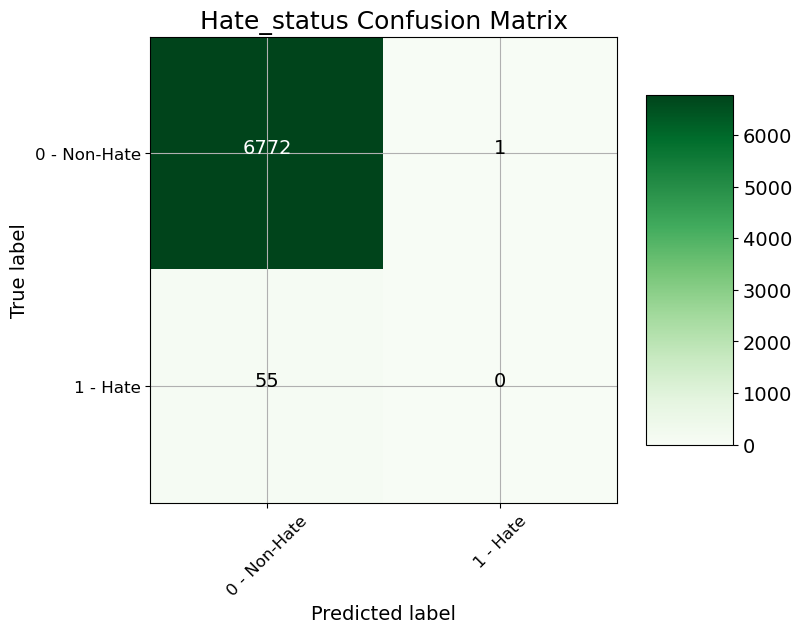

In [274]:
#Plot of Confusion Matrix
plot_confusion_matrix(confusion_matrix(test_labels, pred_best_model_lr), classes = ['0 - Non-Hate', '1 - Hate'],
                      title = 'Hate_status Confusion Matrix')

##### 1.2.5 Assessment of overfitting of the model

###### 1.2.5.1 Max depth assessment

In [46]:
# We are going to perform an analysis over the overfitting over the model taking place here
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
# evaluate a decision tree for each depth
train_scores=[]
test_scores=[]
for i in values:
 # configure the model
    model = LogisticRegression(max_depth=i)
 # fit model on the training dataset
    model.fit(train_features, train_labels)
 # evaluate on the train dataset
    train_yhat = model.predict(train_features)
    train_acc = accuracy_score(train_labels, train_yhat)
    train_scores.append(train_acc)
 # evaluate on the test dataset
    test_yhat = model.predict(test_features)
    test_acc = accuracy_score(test_labels, test_yhat)
    test_scores.append(test_acc)
 # summarize progress
    #print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

print('Conclusion is that the maxdepth is not determinant in increase performance of the model, since the higher the depth defined the better it addapts to the training set without increasing the generasion capacity of the model')

#Source: https://machinelearningmastery.com/overfitting-machine-learning-models/

#Bokeh

TypeError: __init__() got an unexpected keyword argument 'max_depth'

In [275]:
#Baseline Model prior to any optimization
accu_lr_opt=accuracy_score(test_labels, pred_best_model_lr)
prec_lr_opt=precision_score(test_labels, pred_best_model_lr)
recall_lr_opt=recall_score(test_labels, pred_best_model_lr)
f1_lr_opt=f1_score(test_labels, pred_best_model_lr)



# Random Oversampling
LR_ros_learn =LR.fit(train_features_ros, train_labels_ros)
LR_ros_predictions=LR_ros_learn.predict(test_features)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

    #Evaluation metrics of random Oversampling
accu_LR_ros=accuracy_score(test_labels, LR_ros_predictions)
prec_LR_ros=precision_score(test_labels, LR_ros_predictions)
recall_LR_ros=recall_score(test_labels, LR_ros_predictions)
f1_LR_ros=f1_score(test_labels, LR_ros_predictions)

# SMOTE Oversampling
LR_smote_learn =LR.fit(train_features_smote, train_labels_smote)
LR_smote_predictions=LR_smote_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_LR_smote=accuracy_score(test_labels, LR_smote_predictions)
prec_LR_smote=precision_score(test_labels, LR_smote_predictions)
recall_LR_smote=recall_score(test_labels, LR_smote_predictions)
f1_LR_smote=f1_score(test_labels, LR_smote_predictions)

# Random Undersampling
LR_rus_learn =LR.fit(train_features_rus, train_labels_rus)
LR_rus_predictions=LR_rus_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_LR_rus=accuracy_score(test_labels, LR_rus_predictions)
prec_LR_rus=precision_score(test_labels, LR_rus_predictions)
recall_LR_rus=recall_score(test_labels, LR_rus_predictions)
f1_LR_rus=f1_score(test_labels, LR_rus_predictions)


# NearMiss Type 1
LR_nmiss1_learn =LR.fit(train_features_nearmiss1, train_labels_nearmiss1)
LR_nmiss1_predictions=LR_nmiss1_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_LR_nmiss1=accuracy_score(test_labels, LR_nmiss1_predictions)
prec_LR_nmiss1=precision_score(test_labels, LR_nmiss1_predictions)
recall_LR_nmiss1=recall_score(test_labels, LR_nmiss1_predictions)
f1_LR_nmiss1=f1_score(test_labels, LR_nmiss1_predictions)

# NearMiss Type 2
LR_nmiss2_learn =LR.fit(train_features_nearmiss2, train_labels_nearmiss2)
LR_nmiss2_predictions=LR_nmiss2_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_LR_nmiss2=accuracy_score(test_labels, LR_nmiss2_predictions)
prec_LR_nmiss2=precision_score(test_labels, LR_nmiss2_predictions)
recall_LR_nmiss2=recall_score(test_labels, LR_nmiss2_predictions)
f1_LR_nmiss2=f1_score(test_labels, LR_nmiss2_predictions)


# NearMiss Type 3
LR_nmiss3_learn =LR.fit(train_features_nearmiss3, train_labels_nearmiss3)
LR_nmiss3_predictions=LR_nmiss1_learn.predict(test_features)

    #Evaluation metrics of random Oversampling
accu_LR_nmiss3=accuracy_score(test_labels, LR_nmiss3_predictions)
prec_LR_nmiss3=precision_score(test_labels, LR_nmiss3_predictions)
recall_LR_nmiss3=recall_score(test_labels, LR_nmiss3_predictions)
f1_LR_nmiss3=f1_score(test_labels, LR_nmiss3_predictions)

#Assemble all the evaluation results in a dataset
class_balance_lr=pd.DataFrame(
    [
        [accu_LR,accu_LR_ros,accu_LR_smote,accu_LR_rus,accu_LR_nmiss1,accu_LR_nmiss2,accu_LR_nmiss3],
        [prec_LR,prec_LR_ros,prec_LR_smote,prec_LR_rus,prec_LR_nmiss1,prec_LR_nmiss2,prec_LR_nmiss3],
        [recall_LR,recall_LR_ros,recall_LR_smote,recall_LR_rus,recall_LR_nmiss1,recall_LR_nmiss2,recall_LR_nmiss3],
        [f1_LR,f1_LR_ros,f1_LR_smote,f1_LR_rus,f1_LR_nmiss1,f1_LR_nmiss2,f1_LR_nmiss3]
    ],
    columns=["Baseline","Random_Oversampling","SMOTE_Oversampling","Random_Undersampling","NearMiss1_Undersampling","NearMiss2_Undersampling","NearMiss3_Undersampling"],
    index=["Accuracy","Precision","Recall","F1_score"]
)
print(class_balance_lr)

#Perform here the plot of the ROC Curves and the AUC performance (append the AUC to the table above)


C:\Users\Casa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


           Baseline  Random_Oversampling  SMOTE_Oversampling  \
Accuracy   0.991213             0.640890            0.695226   
Precision  0.000000             0.013793            0.016237   
Recall     0.000000             0.618182            0.618182   
F1_score   0.000000             0.026984            0.031643   

           Random_Undersampling  NearMiss1_Undersampling  \
Accuracy               0.634446                 0.047305   
Precision              0.014326                 0.008084   
Recall                 0.654545                 0.963636   
F1_score               0.028037                 0.016034   

           NearMiss2_Undersampling  NearMiss3_Undersampling  
Accuracy                  0.097100                 0.628295  
Precision                 0.008368                 0.013709  
Recall                    0.945455                 0.636364  
F1_score                  0.016590                 0.026840  


C:\Users\Casa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Casa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

<Figure size 640x480 with 0 Axes>

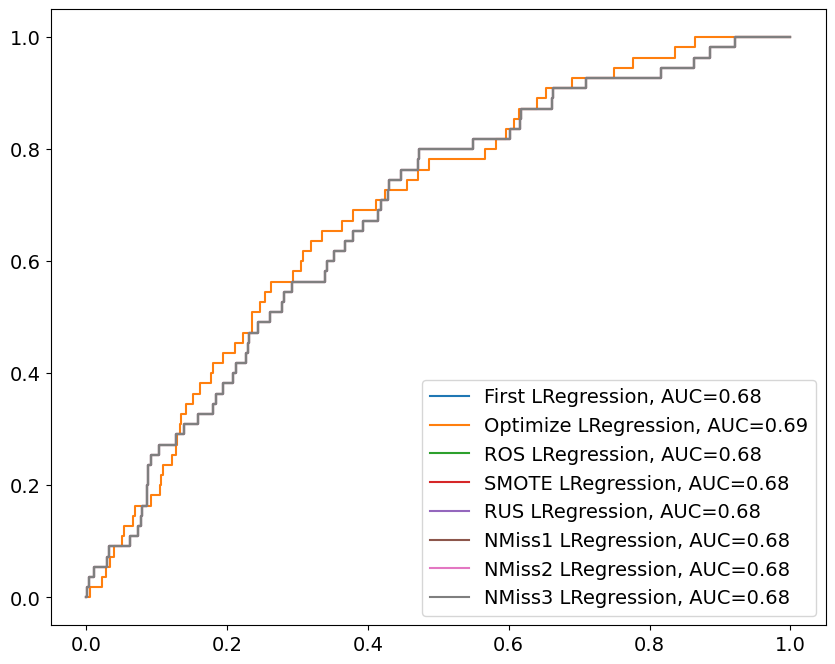

In [276]:
#Now we will plot the two models to be able to assess the two models

#set up plotting area
plt.figure(0).clf()
plt.figure(figsize = (10, 8))

#fit first model and plot ROC curve
probs_lr = LR_learn.predict_proba(test_features)[:, 1]
model_fpr_lr, model_tpr_lr, _ = roc_curve(test_labels, probs_lr)

auc_lr = round(metrics.roc_auc_score(test_labels, probs_lr), 2)
plt.plot(model_fpr_lr,model_tpr_lr,label="First LRegression, AUC="+str(auc_lr))

#fit optimize model and plot ROC curve
auc_tune_lr = round(metrics.roc_auc_score(test_labels, probs_tune_lr), 2)
plt.plot(model_fpr_tune_lr, model_tpr_tune_lr,label="Optimize LRegression, AUC="+str(auc_tune_lr))


#fit Random Oversampling with model and plot ROC curve
probs_LR_ros = LR_ros_learn.predict_proba(test_features)[:, 1]
model_fpr_LR_ros, model_tpr_LR_ros, _ = roc_curve(test_labels, probs_LR_ros)

auc_LR_ros = round(metrics.roc_auc_score(test_labels, probs_LR_ros), 2)
plt.plot(model_fpr_LR_ros, model_tpr_LR_ros,label="ROS LRegression, AUC="+str(auc_LR_ros))

#fit SMOTE Oversampling with  model and plot ROC curve
probs_LR_smote = LR_smote_learn.predict_proba(test_features)[:, 1]
model_fpr_LR_smote, model_tpr_LR_smote, _ = roc_curve(test_labels, probs_LR_smote)

auc_LR_smote = round(metrics.roc_auc_score(test_labels, probs_LR_smote), 2)
plt.plot(model_fpr_LR_smote, model_tpr_LR_smote,label="SMOTE LRegression, AUC="+str(auc_LR_smote))

#fit Random Undersampling with  model and plot ROC curve
probs_LR_rus = LR_rus_learn.predict_proba(test_features)[:, 1]
model_fpr_LR_rus, model_tpr_LR_rus, _ = roc_curve(test_labels, probs_LR_rus)

auc_LR_rus = round(metrics.roc_auc_score(test_labels, probs_LR_rus), 2)
plt.plot(model_fpr_LR_rus, model_tpr_LR_rus,label="RUS LRegression, AUC="+str(auc_LR_rus))


#fit Near Miss_1 Undersampling with  model and plot ROC curve
probs_LR_nmiss1 = LR_nmiss1_learn.predict_proba(test_features)[:, 1]
model_fpr_LR_nmiss1, model_tpr_LR_nmiss1, _ = roc_curve(test_labels, probs_LR_nmiss1)

auc_LR_nmiss1 = round(metrics.roc_auc_score(test_labels, probs_LR_nmiss1), 2)
plt.plot(model_fpr_LR_nmiss1, model_tpr_LR_nmiss1,label="NMiss1 LRegression, AUC="+str(auc_LR_nmiss1))

#fit Near Miss_2 Undersampling with  model and plot ROC curve
probs_LR_nmiss2 = LR_nmiss2_learn.predict_proba(test_features)[:, 1]
model_fpr_LR_nmiss2, model_tpr_LR_nmiss2, _ = roc_curve(test_labels, probs_LR_nmiss2)

auc_LR_nmiss2 = round(metrics.roc_auc_score(test_labels, probs_LR_nmiss2), 2)
plt.plot(model_fpr_LR_nmiss2, model_tpr_LR_nmiss2,label="NMiss2 LRegression, AUC="+str(auc_LR_nmiss2))

#fit Near Miss_3 Undersampling with  model and plot ROC curve
probs_LR_nmiss3 = LR_nmiss3_learn.predict_proba(test_features)[:, 1]
model_fpr_LR_nmiss3, model_tpr_LR_nmiss3, _ = roc_curve(test_labels, probs_LR_nmiss3)

auc_LR_nmiss3 = round(metrics.roc_auc_score(test_labels, probs_LR_nmiss3), 2)
plt.plot(model_fpr_LR_nmiss3, model_tpr_LR_nmiss3,label="NMiss3 LRegression, AUC="+str(auc_LR_nmiss3))


#add legend
plt.legend()

#Source: https://www.statology.org/plot-multiple-roc-curves-python/

In [277]:
class_balance_lr=pd.DataFrame(
    [
        [accu_LR,accu_lr_opt,accu_LR_ros,accu_LR_smote,accu_LR_rus,accu_LR_nmiss1,accu_LR_nmiss2,accu_LR_nmiss3],
        [prec_LR,prec_lr_opt,prec_LR_ros,prec_LR_smote,prec_LR_rus,prec_LR_nmiss1,prec_LR_nmiss2,prec_LR_nmiss3],
        [recall_LR,recall_lr_opt,recall_LR_ros,recall_LR_smote,recall_LR_rus,recall_LR_nmiss1,recall_LR_nmiss2,recall_LR_nmiss3],
        [f1_LR,f1_lr_opt,f1_LR_ros,f1_LR_smote,f1_LR_rus,f1_LR_nmiss1,f1_LR_nmiss2,f1_LR_nmiss3],
        [auc_lr,auc_tune_lr,auc_dt_ros,auc_dt_smote,auc_dt_rus,auc_dt_nmiss1,auc_dt_nmiss2,auc_dt_nmiss3]

    ],
    columns=["Baseline","Optimized_Model","Random_Oversampling","SMOTE_Oversampling","Random_Undersampling","NearMiss1_Undersampling","NearMiss2_Undersampling","NearMiss3_Undersampling"],
    index=["Accuracy","Precision","Recall","F1_score","AUC"]
)
print(class_balance_lr)

           Baseline  Optimized_Model  Random_Oversampling  SMOTE_Oversampling  \
Accuracy   0.991213         0.991798             0.640890            0.695226   
Precision  0.000000         0.000000             0.013793            0.016237   
Recall     0.000000         0.000000             0.618182            0.618182   
F1_score   0.000000         0.000000             0.026984            0.031643   
AUC        0.680000         0.690000             0.590000            0.590000   

           Random_Undersampling  NearMiss1_Undersampling  \
Accuracy               0.634446                 0.047305   
Precision              0.014326                 0.008084   
Recall                 0.654545                 0.963636   
F1_score               0.028037                 0.016034   
AUC                    0.590000                 0.590000   

           NearMiss2_Undersampling  NearMiss3_Undersampling  
Accuracy                  0.097100                 0.628295  
Precision                 0.

## 2 Results from the predictive Pipeline

### 2.1 Evaluation Metrics

#### 2.1.1 Results from above
Here we will have to choose which iteration we are going to select as prefered

In [278]:
#Results from Random Forest and pick the results we prefer from this iteration
print(class_balance_rf)
rf_choice=input("From random forest we choose iteration: ")


           Baseline  Optimized  Random_Oversampling  SMOTE_Oversampling  \
Accuracy   0.991945   0.991945             0.991945            0.991798   
Precision  0.000000   0.000000             0.000000            0.000000   
Recall     0.000000   0.000000             0.000000            0.000000   
F1_score   0.000000   0.000000             0.000000            0.000000   
AUC        0.750000   0.750000             0.650000            0.650000   

           Random_Undersampling  NearMiss1_Undersampling  \
Accuracy               0.637083                 0.041301   
Precision              0.015594                 0.008034   
Recall                 0.709091                 0.963636   
F1_score               0.030516                 0.015935   
AUC                    0.650000                 0.650000   

           NearMiss2_Undersampling  NearMiss3_Undersampling  
Accuracy                  0.024312                 0.510252  
Precision                 0.008042                 0.011293  
Re

From random forest we choose iteration:  Random_Undersampling


In [279]:
#Results from Decision Tree and pick the results we prefer from this iteration
print(class_balance_dt)
dt_choice=input("From decision tree we choose iteration: ")


           Baseline  Optimize  Random_Oversampling  SMOTE_Oversampling  \
Accuracy   0.983597  0.991945             0.982865            0.977885   
Precision  0.109589  0.000000             0.069444            0.029412   
Recall     0.145455  0.000000             0.090909            0.054545   
F1_score   0.125000  0.000000             0.078740            0.038217   
AUC        0.590000  0.680000             0.590000            0.590000   

           Random_Undersampling  NearMiss1_Undersampling  \
Accuracy               0.635325                 0.034124   
Precision              0.014747                 0.007975   
Recall                 0.672727                 0.963636   
F1_score               0.028861                 0.015819   
AUC                    0.590000                 0.590000   

           NearMiss2_Undersampling  NearMiss3_Undersampling  
Accuracy                  0.018600                 0.459139  
Precision                 0.007995                 0.010758  
Recall  

From decision tree we choose iteration:  Random_Undersampling


In [280]:
#Results from Logistics Regression and pick the results we prefer from this iteration
print(class_balance_lr)
lr_choice=input("From logistics regression we choose iteration: ")


           Baseline  Optimized_Model  Random_Oversampling  SMOTE_Oversampling  \
Accuracy   0.991213         0.991798             0.640890            0.695226   
Precision  0.000000         0.000000             0.013793            0.016237   
Recall     0.000000         0.000000             0.618182            0.618182   
F1_score   0.000000         0.000000             0.026984            0.031643   
AUC        0.680000         0.690000             0.590000            0.590000   

           Random_Undersampling  NearMiss1_Undersampling  \
Accuracy               0.634446                 0.047305   
Precision              0.014326                 0.008084   
Recall                 0.654545                 0.963636   
F1_score               0.028037                 0.016034   
AUC                    0.590000                 0.590000   

           NearMiss2_Undersampling  NearMiss3_Undersampling  
Accuracy                  0.097100                 0.628295  
Precision                 0.

From logistics regression we choose iteration:  Random_Undersampling


In [281]:
print(class_balance_rf[[rf_choice]])
print(class_balance_dt[[dt_choice]])
print(class_balance_lr[[lr_choice]])

           Random_Undersampling
Accuracy               0.637083
Precision              0.015594
Recall                 0.709091
F1_score               0.030516
AUC                    0.650000
           Random_Undersampling
Accuracy               0.635325
Precision              0.014747
Recall                 0.672727
F1_score               0.028861
AUC                    0.590000
           Random_Undersampling
Accuracy               0.634446
Precision              0.014326
Recall                 0.654545
F1_score               0.028037
AUC                    0.590000


<Figure size 640x480 with 0 Axes>

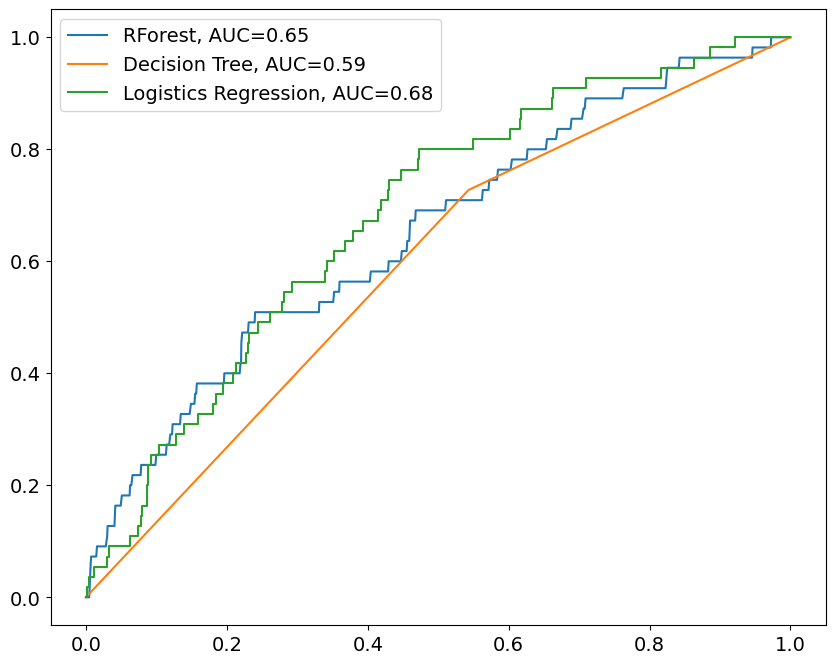

In [282]:
#Now we will plot the models we choosed from the above iterations

#set up plotting area
plt.figure(0).clf()
plt.figure(figsize = (10, 8))

#probs_## -> basic
#probs_tune_lr- optimized
#probs_LR_ros ->ROS
#probs_LR_smote ->SMOTE
#probs_LR_rus ->RUS
#probs_LR_nmiss1 -> bnmiss1
#probs_LR_nmiss2 -> bnmiss2
#probs_LR_nmiss3 -> bnmiss3



#fit random forest model and plot ROC curve we choosed
auc_rf_choice = round(metrics.roc_auc_score(test_labels, probs_rf_rus), 2) #change the ### from "probs###" for the one we want 
plt.plot(model_fpr_rf_rus,model_tpr_rf_rus,label="RForest, AUC="+str(auc_rf_choice))  #change the ### from "model_###" for the one we want 

#fit decision tree model and plot ROC curve we choosed
auc_dt_choice = round(metrics.roc_auc_score(test_labels, probs_dt_rus), 2) #change the ### from "probs###" for the one we want 
plt.plot(model_fpr_dt_rus, model_tpr_dt_rus,label="Decision Tree, AUC="+str(auc_dt_choice)) #change the ### from "model_###" for the one we want 

#fit logistics regression model and plot ROC curve we choosed
auc_lr_choice = round(metrics.roc_auc_score(test_labels, probs_LR_rus), 2) #change the ### from "probs###" for the one we want 
plt.plot(model_fpr_LR_rus, model_tpr_LR_rus,label="Logistics Regression, AUC="+str(auc_lr_choice))  #change the ### from "model_###" for the one we want 


#add legend
plt.legend()